<a href="https://colab.research.google.com/github/Lrs-mtos/song-popularity-ML/blob/develop_adrian/song_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Get the data

In [2]:
import os
import requests
import zipfile
import pandas as pd

url = "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
zip_path = "spotify_songs.zip"
extract_path = "./datasets"
#create dataframe songs:


# Faz o download do arquivo zip
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)


##Analizando o Dataset

In [3]:
csv_path = os.path.join(extract_path, "spotify_songs.csv")
songs = pd.read_csv(csv_path)
print(songs.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [4]:

songs.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [5]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
songs["danceability"].value_counts()

danceability
0.733    118
0.708    115
0.704    112
0.694    112
0.784    111
        ... 
0.202      1
0.172      1
0.261      1
0.174      1
0.983      1
Name: count, Length: 822, dtype: int64

In [7]:
songs.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

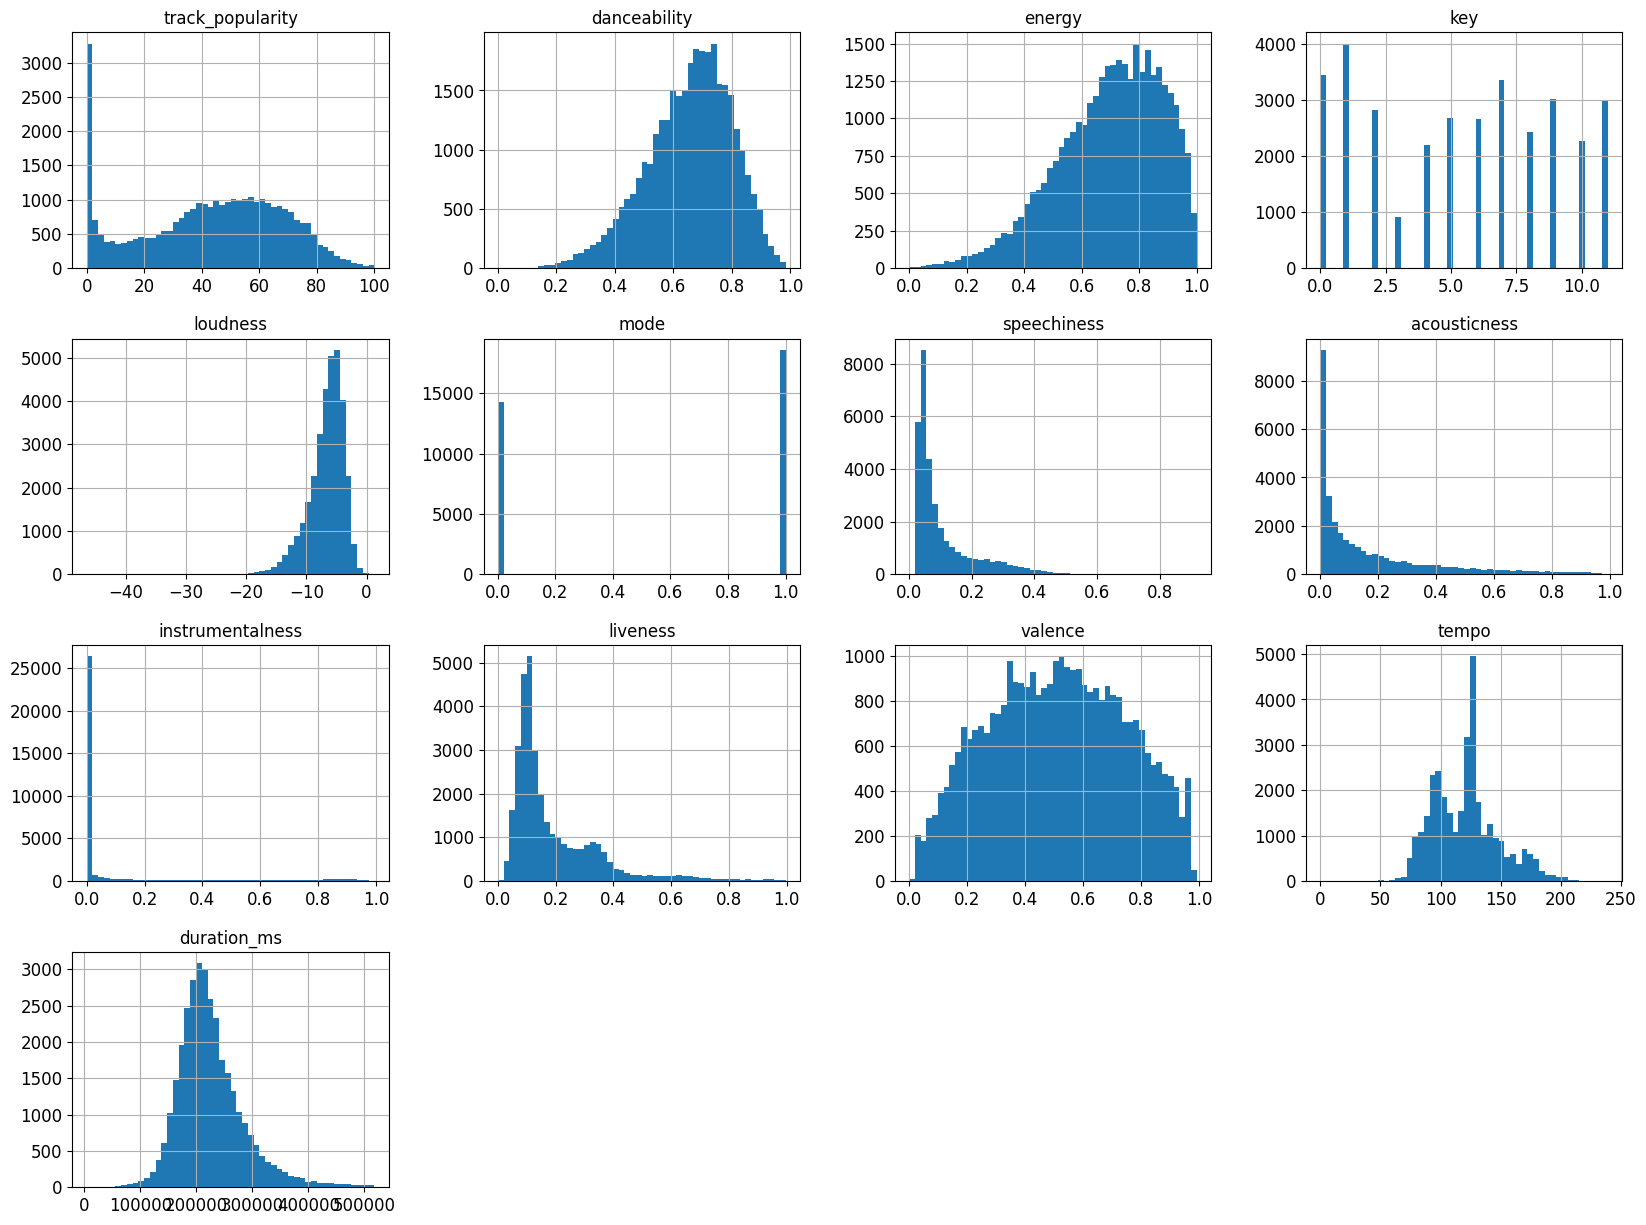

In [8]:
import matplotlib.pyplot as plt
songs.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Set Test

In [55]:
#to make this notebook's output identical at every run
np.random.seed(42)

In [56]:
import numpy as np# Use train_test_split to split the data into a training set and a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(songs, test_size=0.2, random_state=42)
len(train_set)

26266

In [57]:
len(test_set)

6567

##Funções gerais

In [62]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# def onehotTopArtists(train_df, test_df, n=50):
#     # 1️⃣ Calcula a média ponderada da popularidade de cada artista
#     # Ajustando para a soma ponderada corretamente, utilizando o tamanho do grupo (contagem de músicas)
#     artist_popularity = train_df.groupby('track_artist')['track_popularity'].agg(
#         lambda x: x.sum() / (x.count()+15)
#     )

#     # 2️⃣ Seleciona os 'n' artistas mais populares pela média ponderada de popularidade
#     top_artists = artist_popularity.nlargest(n).index.tolist()

#     # 3️⃣ Mantém apenas os artistas mais populares e substitui os outros por "Other"
#     train_df['track_artist'] = train_df['track_artist'].apply(lambda x: x if x in top_artists else 'Other')
#     test_df['track_artist'] = test_df['track_artist'].apply(lambda x: x if x in top_artists else 'Other')

#     # 4️⃣ Inicializa o OneHotEncoder
#     encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # 'ignore' mantém apenas os artistas vistos no treino

#     # 5️⃣ Aplica One-Hot Encoding no treino e no teste
#     train_encoded = encoder.fit_transform(train_df[['track_artist']])
#     test_encoded = encoder.transform(test_df[['track_artist']])  # 🚀 Artistas desconhecidos viram 0

#     # 6️⃣ Converte para DataFrame
#     train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['track_artist']))
#     test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['track_artist']))

#     # 7️⃣ Concatena com os DataFrames originais e remove a coluna original
#     train_df = pd.concat([train_df.reset_index(drop=True), train_encoded_df], axis=1).drop(columns=['track_artist'])
#     test_df = pd.concat([test_df.reset_index(drop=True), test_encoded_df], axis=1).drop(columns=['track_artist'])

#     return train_df, test_df


import pandas as pd

def encodeArtistPopularity(train_df, val_df, target_column='track_popularity'):

    # Calcula a média da popularidade de cada artista no train_set
    artist_popularity = train_df.groupby('track_artist')[target_column].mean()

    # Calcula a média global de popularidade dos artistas do train_df
    global_mean_popularity = artist_popularity.mean()

    # Adiciona a nova coluna 'artist_popularity' no train_df
    train_df['artist_popularity'] = train_df['track_artist'].map(artist_popularity)

    # No val_df, se o artista existir no train_df, usamos a média; se não, usamos a média global
    val_df['artist_popularity'] = val_df['track_artist'].map(artist_popularity).fillna(global_mean_popularity)

    # Remove a coluna original 'track_artist'
    train_df = train_df.drop(columns=['track_artist'])
    val_df = val_df.drop(columns=['track_artist'])

    return train_df, val_df





In [63]:
train_set_test = train_set.copy()
test_set_test = test_set.copy()
train_set_test, test_set_test = encodeArtistPopularity(train_set_test, test_set_test)

In [64]:
test_set_test.describe()

track_popularity  danceability       energy          key     loudness  \
count       6567.000000   6567.000000  6567.000000  6567.000000  6567.000000   
mean          42.200091      0.653175     0.702035     5.354347    -6.699322   
std           24.920376      0.145839     0.180335     3.597272     3.038761   
min            0.000000      0.000000     0.008140     0.000000   -36.509000   
25%           24.000000      0.561000     0.587500     2.000000    -8.179000   
50%           45.000000      0.672000     0.725000     6.000000    -6.131000   
75%           62.000000      0.759000     0.844500     8.000000    -4.614000   
max           99.000000      0.983000     0.996000    11.000000    -0.046000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  6567.000000  6567.000000   6567.000000       6567.000000  6567.000000   
mean      0.578955     0.107411      0.170523          0.088057     0.193091   
std       0.493764     0.100962      0.214950          0.228307     0.156704   
min       0.000000     0.000000      0.000000          0.000000     0.000000   
25%       0.000000     0.041700      0.014000          0.000000     0.093000   
50%       1.000000     0.064100      0.078700          0.000018     0.128000   
75%       1.000000     0.132000      0.247000          0.005285     0.256000   
max       1.000000     0.877000      0.985000          0.987000     0.994000   

           valence        tempo    duration_ms  artist_popularity  
count  6567.000000  6567.000000    6567.000000        6567.000000  
mean      0.507835   120.816893  225665.389523          42.715802  
std       0.234818    26.866529   58699.558221          16.812848  
min       0.000000     0.000000    4000.000000           0.000000  
25%       0.324000    99.990000  188587.000000          37.181818  
50%       0.510000   121.990000  216667.000000          39.000000  
75%       0.693000   132.994000  254687.500000          54.466667  
max       0.985000   220.252000  517810.000000          97.000000

In [14]:
def categorizeInstrumentalnessAndOneHot(train_df, test_df, instrumentalness_column):
    # Função para categorizar instrumentalness
    def categorize_instrumentalness(instrumentalness):
        return 1 if instrumentalness > 0.6 else 0  # 1 = instrumental, 0 = não instrumental

    # 1️⃣ Categoriza a variável 'instrumentalness'
    train_df['instrumentalness_categorized'] = train_df[instrumentalness_column].apply(categorize_instrumentalness)
    test_df['instrumentalness_categorized'] = test_df[instrumentalness_column].apply(categorize_instrumentalness)

    # 2️⃣ Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['instrumentalness_categorized']])
    instrumentalness_columns = encoder.get_feature_names_out(['instrumentalness_categorized'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=instrumentalness_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['instrumentalness_categorized']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=instrumentalness_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=instrumentalness_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais (sem a coluna original 'instrumentalness')
    train_df = pd.concat([train_df.drop(columns=[instrumentalness_column, 'instrumentalness_categorized']), train_encoded_df], axis=1)
    test_df = pd.concat([test_df.drop(columns=[instrumentalness_column, 'instrumentalness_categorized']), test_encoded_df], axis=1)

    return train_df, test_df

In [15]:
### Categoriza a acousticnes como 0 = não é acustica, 1 = provavelmente é acustica, logo em seguida faz o onehot
def categorizeAcousticnessAndOneHot(train_df, test_df, acousticness_column):
    def categorize(acousticness):
        if acousticness > 0.7:
            return 1  # Acústico
        else:
            return 0  # Não acústico

    # 1️⃣ Categoriza o acousticness
    train_df['acousticness_categorized'] = train_df[acousticness_column].apply(categorize)
    test_df['acousticness_categorized'] = test_df[acousticness_column].apply(categorize)

    # 2️⃣ Inicializa OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['acousticness_categorized']])
    acousticness_columns = encoder.get_feature_names_out(['acousticness_categorized'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=acousticness_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['acousticness_categorized']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=acousticness_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=acousticness_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    # 7️⃣ Remove a coluna categórica original
    train_df.drop(columns=['acousticness_categorized'], inplace=True)
    test_df.drop(columns=['acousticness_categorized'], inplace=True)

    train_df.drop(columns=[acousticness_column], inplace=True)
    test_df.drop(columns=[acousticness_column], inplace=True)

    return train_df, test_df

In [16]:
### Categoriza a speechiness como 0 = somente musica, 1 = musica e fala, 2 = provavelmente é só fala, logo em seguida faz o onehot
def categorizeSpeechinessAndOneHot(train_df, test_df, speechiness_column):
    def categorize(speechiness):
        if speechiness <= 0.33:
            return 0  # Não-falado (somente música)
        elif speechiness <= 0.66:
            return 1  # Música e fala (misturado)
        else:
            return 2  # Exclusivamente falado

    # 1️⃣ Categoriza o speechiness
    train_df['speechiness_categorized'] = train_df[speechiness_column].apply(categorize)
    test_df['speechiness_categorized'] = test_df[speechiness_column].apply(categorize)

    # 2️⃣ Inicializa OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['speechiness_categorized']])
    speechiness_columns = encoder.get_feature_names_out(['speechiness_categorized'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=speechiness_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['speechiness_categorized']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=speechiness_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=speechiness_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    # 7️⃣ Remove a coluna categórica original
    train_df.drop(columns=['speechiness_categorized'], inplace=True)
    test_df.drop(columns=['speechiness_categorized'], inplace=True)

    train_df.drop(columns=[speechiness_column], inplace=True)
    test_df.drop(columns=[speechiness_column], inplace=True)

    return train_df, test_df

In [17]:
### Categoriza a mode como 0 = modo 0 e 1 = modo 1, logo em seguida faz o onehot
def categorizeModeAndOneHot(train_df, test_df, mode_column):
    # Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Aplica OneHot na coluna 'mode'
    train_encoded = encoder.fit_transform(train_df[[mode_column]])
    mode_columns = encoder.get_feature_names_out([mode_column])
    train_encoded_df = pd.DataFrame(train_encoded, columns=mode_columns, index=train_df.index)

    test_encoded = encoder.transform(test_df[[mode_column]])
    test_encoded_df = pd.DataFrame(test_encoded, columns=mode_columns, index=test_df.index)

    # Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    train_df.drop(columns=[mode_column], inplace=True)
    test_df.drop(columns=[mode_column], inplace=True)



    return train_df, test_df

In [18]:
### Categoriza a key em categorias de 0 a 11 ou em no_key, logo em seguida faz o onehot
def categorizeKeyAndOneHot(train_df, test_df, key_column):
    # Substitui o valor -1 por uma categoria extra chamada 'no_key'
    train_df['key'] = train_df[key_column].replace(-1, 'no_key')
    test_df['key'] = test_df[key_column].replace(-1, 'no_key')

    # Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Aplica OneHot na coluna 'key'
    train_encoded = encoder.fit_transform(train_df[['key']])
    key_columns = encoder.get_feature_names_out(['key'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=key_columns, index=train_df.index)

    test_encoded = encoder.transform(test_df[['key']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=key_columns, index=test_df.index)

    # Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    train_df.drop(columns=[key_column], inplace=True)
    test_df.drop(columns=[key_column], inplace=True)

    return train_df, test_df

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def categorizeGenreAndOneHot(train_df, test_df, genre_column):
    # Verifica se a coluna existe antes de proceder
    if genre_column not in train_df.columns or genre_column not in test_df.columns:
        raise ValueError(f"A coluna '{genre_column}' não foi encontrada no DataFrame.")

    # 1️⃣ Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 2️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[[genre_column]])
    genre_columns = encoder.get_feature_names_out([genre_column])
    train_encoded_df = pd.DataFrame(train_encoded, columns=genre_columns, index=train_df.index)

    # 3️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[[genre_column]])
    test_encoded_df = pd.DataFrame(test_encoded, columns=genre_columns, index=test_df.index)

    # 4️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=genre_columns, fill_value=0)

    # 5️⃣ Junta os novos DataFrames com os originais, removendo a coluna original 'genre'
    train_df = pd.concat([train_df.drop(columns=[genre_column]), train_encoded_df], axis=1)
    test_df = pd.concat([test_df.drop(columns=[genre_column]), test_encoded_df], axis=1)

    # 6️⃣ Remove a coluna de gênero original, caso não tenha sido removida ainda
    if genre_column in train_df.columns:
        train_df.drop(columns=[genre_column], inplace=True)
    if genre_column in test_df.columns:
        test_df.drop(columns=[genre_column], inplace=True)

    return train_df, test_df


In [20]:
def categorizeSubgenre(train_df, test_df, subgenre_column):
    """Aplica One-Hot Encoding na coluna de subgênero."""
    if subgenre_column not in train_df.columns or subgenre_column not in test_df.columns:
        raise ValueError(f"A coluna '{subgenre_column}' não foi encontrada no DataFrame.")

    # Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Aplica One-Hot no treino
    train_encoded = encoder.fit_transform(train_df[[subgenre_column]])
    subgenre_columns = encoder.get_feature_names_out([subgenre_column])
    train_encoded_df = pd.DataFrame(train_encoded, columns=subgenre_columns, index=train_df.index)

    # Aplica One-Hot no teste
    test_encoded = encoder.transform(test_df[[subgenre_column]])
    test_encoded_df = pd.DataFrame(test_encoded, columns=subgenre_columns, index=test_df.index)

    # Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=subgenre_columns, fill_value=0)

    # Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df.drop(columns=[subgenre_column]), train_encoded_df], axis=1)
    test_df = pd.concat([test_df.drop(columns=[subgenre_column]), test_encoded_df], axis=1)

    return train_df, test_df

In [21]:
###Removendo dados duplicados no dataset
def removeDuplicates(df):
    # Adiciona uma coluna auxiliar com o nome da música em lowercase
    df['track_name_lower'] = df['track_name'].str.lower()
    df['track_artist_lower'] = df['track_artist'].str.lower()
    # Remove duplicatas usando a coluna auxiliar
    df_unique = df.drop_duplicates(subset=['track_artist_lower', 'track_name_lower'])
    # Remove a coluna auxiliar antes de retornar
    df_unique = df_unique.drop(columns=['track_name_lower','track_artist_lower'])
    return df_unique

In [22]:
###Remoção de colunas desnecessarias para a predição do modelo
def removeColumns(df, columns_name):
    return df.drop(columns=columns_name)

In [23]:
###Remoção de linhas que possuem algum dado em branco e que não pode ser obtido atraves de outros dados
def removeRowNaN(songs_cp):
    songs_cp_sem_nulos = songs_cp.dropna(axis=0, how='any')
    return songs_cp_sem_nulos

def dropRowsEmpty(songs_cp):
    songs_cp_sem_nulos = removeRowNaN(songs_cp)
    valores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()
    songs_cp = songs_cp_sem_nulos
    return songs_cp

In [24]:
###Normalizar os dados numericos
def normalizeColumns(train_df, test_df, columns_to_normalize):
    # Inicializa o MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Aplica a normalização nas colunas especificadas no conjunto de treino
    train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

    # Aplica a mesma normalização no conjunto de teste
    test_df[columns_to_normalize] = scaler.transform(test_df[columns_to_normalize])

    return train_df, test_df

In [25]:
### Retorna o dataframe com a decomposição da 'track_album_release_date' em 'track_year' e 'track_month'
def decompositionDateTransform(X_train, X_test, date_column):
    def get_year(date):
        if isinstance(date, str) and len(date) >= 4 and date[:4].isdigit():
            return int(date[:4])
        return None

    def get_month(date):
        if isinstance(date, str) and len(date) >= 7:
            parts = date.split('-')
            if len(parts) > 1 and parts[1].isdigit():
                return int(parts[1])  # Retorna o mês como número inteiro
        return None

    # Aplica a transformação nos dois conjuntos
    for df in [X_train, X_test]:
        df['track_year'] = df[date_column].apply(get_year)
        df['track_month'] = df[date_column].apply(get_month)

        # Remove a coluna 'track_month'
        df.drop(columns=['track_month'], inplace=True)
        df.drop(columns=[date_column], inplace=True)

    return X_train, X_test



In [26]:
from sklearn.decomposition import PCA
import pandas as pd

def apply_pca(train_set, val_set, target_column, n_components=10):
    # Separar a coluna alvo
    y_train = train_set[target_column]
    y_val = val_set[target_column]

    # Remover a coluna alvo do conjunto de treinamento e validação
    X_train = train_set.drop(columns=[target_column])
    X_val = val_set.drop(columns=[target_column])

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    X_train_reduced = pca.fit_transform(X_train)
    X_val_reduced = pca.transform(X_val)

    # Converter para DataFrame
    X_train_reduced = pd.DataFrame(X_train_reduced, index=train_set.index)
    X_val_reduced = pd.DataFrame(X_val_reduced, index=val_set.index)

    # Adicionar a coluna alvo de volta
    X_train_reduced[target_column] = y_train.values
    X_val_reduced[target_column] = y_val.values

    return X_train_reduced, X_val_reduced, pca



In [27]:
import pandas as pd
from sklearn.utils import resample

def under_sample(train_set, val_set, target_column='track_popularity', percentage_to_remove=0.85):
    # Filtrando as faixas com popularidade 0
    zero_popularity = train_set[train_set[target_column] == 0]

    # Filtrando as faixas com popularidade maior que 0
    non_zero_popularity = train_set[train_set[target_column] > 0]

    # Determinando o número de amostras a serem removidas
    num_samples_to_remove = int(len(zero_popularity) * percentage_to_remove)

    # Remover aleatoriamente essas amostras
    zero_popularity_removed = zero_popularity.sample(n=num_samples_to_remove, random_state=42)

    # Remover as faixas de popularidade 0 do dataset
    train_set_balanced = train_set.drop(zero_popularity_removed.index)

    # Retornando o dataset balanceado para treino e o conjunto de validação sem alteração
    return train_set_balanced, val_set

In [28]:
from imblearn.over_sampling import SMOTE

def over_sample(train_set, val_set, target_column='track_popularity'):
    # Separando features (X) e target (y) para o conjunto de treino
    X_train = train_set.drop(columns=[target_column])
    y_train = train_set[target_column]

    # Usando o SMOTE para realizar over-sampling nas faixas com popularidade 0
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Recriando o DataFrame balanceado
    train_set_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)
    train_set_balanced[target_column] = y_train_balanced

    # Retornando o dataset balanceado para treino e o conjunto de validação sem alteração
    return train_set_balanced, val_set


In [29]:
def remove_zero_popularity(train_set, val_set, target_column='track_popularity', percentage_to_remove=0.5):
    # Filtrando as faixas com popularidade igual a 0
    zero_popularity = train_set[train_set[target_column] == 0]

    # Calculando o número de faixas a ser removido (50% das faixas com popularidade 0)
    num_to_remove = int(len(zero_popularity) * percentage_to_remove)

    # Removendo as faixas com popularidade 0
    if num_to_remove > 0:
        zero_popularity_removed = zero_popularity.sample(n=num_to_remove, random_state=42)
        train_set = train_set.drop(zero_popularity_removed.index)

    # Retornando o dataset com faixas removidas e o conjunto de validação sem alteração
    return train_set, val_set


##Funções de apoio

In [30]:
###Retorna todos os artistas e suas respectivas popularidades
def getArtistsAndPopularity(df, alpha=5):
    # Verifica se as colunas necessárias existem no DataFrame
    if 'track_artist' not in df.columns or 'track_popularity' not in df.columns:
        raise ValueError("O dataset deve conter as colunas 'track_artist' e 'track_popularity'.")
    # Calcula a popularidade total por artista
    artist_total_popularity = df.groupby('track_artist')['track_popularity'].sum()
    # Conta o número de músicas por artista
    artist_song_count = df.groupby('track_artist').size()
    # Calcula a popularidade ponderada para cada artista
    artist_weighted_popularity = artist_total_popularity / (artist_song_count + alpha)
    # Ordena os artistas pela popularidade ponderada em ordem decrescente
    artist_weighted_popularity_sorted = artist_weighted_popularity.sort_values(ascending=False)
    # Retorna o DataFrame com o nome do artista e sua popularidade
    return artist_weighted_popularity_sorted.reset_index()

In [31]:
###Retorna as n musicas mais populares do dataset
def getTopSongs(df,n):
  return df[['track_name', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(n)

In [32]:
### Retorna o dataframe com o onehot de duration_ms
def classifyDurationAndOneHot(train_df, test_df, millis_column):
    def classify(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            duration_minutes = millis / 60000
            if duration_minutes < 1:
                return 0
            elif duration_minutes <= 1.7:
                return 1
            elif duration_minutes <= 2.7:
                return 2
            elif duration_minutes <= 3.7:
                return 3
            elif duration_minutes <= 4.7:
                return 4
            elif duration_minutes <= 5.7:
                return 5
            elif duration_minutes <= 6.7:
                return 6
            else:
                return 7
        return None

    # 1️⃣ Classifica a duração
    train_df['track_duration_classification'] = train_df[millis_column].apply(classify)
    test_df['track_duration_classification'] = test_df[millis_column].apply(classify)

    # 2️⃣ Inicializa OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['track_duration_classification']])
    duration_columns = encoder.get_feature_names_out(['track_duration_classification'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=duration_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['track_duration_classification']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=duration_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=duration_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    # 7️⃣ Remove a coluna categórica original
    train_df.drop(columns=['track_duration_classification'], inplace=True)
    test_df.drop(columns=['track_duration_classification'], inplace=True)

    return train_df, test_df


In [36]:
train_set_test = train_set.copy()
test_set_test = test_set.copy()
train_set_test,test_set_test = classifyDurationAndOneHot(train_set_test,test_set_test,'duration_ms')

In [37]:
count = train_set_test['track_duration_classification_0'].sum()

In [33]:
def remove_rows_with_value_1(df, column_name='track_duration_classification_0'):
    # Remove todas as linhas onde o valor da coluna especificada é igual a 1
    df_filtered = df[df[column_name] != 1].reset_index(drop=True)

    return df_filtered

In [39]:
print(count)

12.0


##Vizualização de graficos para representação dos dados

In [40]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['speechiness'])
# plt.title('Boxplot de Speechiness')
# plt.show()

In [41]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['acousticness'])
# plt.title('Boxplot de acousticness')
# plt.show()

In [42]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['energy'])
# plt.title('Boxplot de energy')
# plt.show()

In [43]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['instrumentalness'])
# plt.title('Boxplot de instrumentalness')
# plt.show()

In [44]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['liveness'])
# plt.title('Boxplot de liveness')
# plt.show()

In [45]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['key'])
# plt.title('Boxplot de key')
# plt.show()

In [46]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['tempo'])
# plt.title('Boxplot de tempo')
# plt.show()

In [47]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['loudness'])
# plt.title('Boxplot de loudness')
# plt.show()

In [48]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['mode'])
# plt.title('Boxplot de mode')
# plt.show()

In [49]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['duration_ms'])
# plt.title('Boxplot de duration_ms')
# plt.show()

In [50]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['track_popularity'])
# plt.title('Boxplot de track_popularity')
# plt.show()

In [51]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['valence'])
# plt.title('Boxplot de valence')
# plt.show()

In [52]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['danceability'])
# plt.title('Boxplot de danceability')
# plt.show()

In [53]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=songs['tempo'])
# plt.title('Boxplot de tempo')
# plt.show()

In [34]:
def split_target_features(df):

  # X_feat: variáveis independentes
  X_feat = df.drop(columns=['track_popularity'])

  # y_feat: target
  y_feat = df['track_popularity']

  return X_feat, y_feat

def plot_predictions(df, model, ax=None):
    X, y_true = split_target_features(df)
    y_pred = model.predict(X)

    if ax is None:
        fig, ax = plt.subplots()  # Cria um novo gráfico se nenhum eixo for passado

    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.set_xlabel("Valores Reais")
    ax.set_ylabel("Valores Preditos")
    ax.set_title("Popularidade das Músicas")
    ax.set_title(f'Predições do {type(model).__name__}')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plotpredictions(model, y_pred, y_true, train_set, rmse, mean_cv_score):
    # 1️⃣ Gráfico de Dispersão para as predições vs valores reais
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2, linestyle='--')  # Linha y=x
    plt.title('Predições vs Valores Reais')
    plt.xlabel('Valores Reais')
    plt.ylabel('Predições')
    plt.grid(True)
    plt.show()

    # 2️⃣ Gráfico de Distribuição para os valores reais
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_true, color='green', fill=True, label='Valores Reais')
    sns.kdeplot(y_pred, color='blue', fill=True, label='Predições')
    plt.title('Distribuição dos Valores Reais e Predições')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

    # 3️⃣ Gráfico de Histograma para os valores reais
    plt.figure(figsize=(10, 6))
    plt.hist(y_true, bins=30, alpha=0.5, label='Valores Reais', color='green')
    plt.hist(y_pred, bins=30, alpha=0.5, label='Predições', color='blue')
    plt.title('Histograma dos Valores Reais e Predições')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

    # Mostrar RMSE e Média de MAE da validação cruzada
    print(f"RMSE: {rmse}")
    print(f"Mean Cross-Validation MAE: {mean_cv_score}")

    # 4️⃣ Verificar se o modelo possui a propriedade de importâncias das features
    if hasattr(model, 'feature_importances_'):
        # Extrair as importâncias das features
        feature_importances = model.feature_importances_

        # Criar um DataFrame com as importâncias
        features = train_set.drop(columns=[target_column]).columns  # Usando as features do conjunto de treino
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        })

        # Ordenar pelas importâncias e pegar as 30 mais importantes
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(30)

        print("\nTop 30 Features mais Importantes:")
        for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance']), 1):
            print(f"{i}. {feature}: {importance:.6f}")
    else:
        print("O modelo não possui a propriedade 'feature_importances_' para calcular as importâncias das features.")


##Funções para uso no pipeline

In [38]:
###Realiza a limpeza do dataset, removendo dados duplicados e linhas que tenham algum valor NULL ou NaN
def dataCleaning(x_train, x_test):
  #remove as musicas repetidas de acordo com as colunas track_artist e track_name
  x_train = removeDuplicates(x_train)
  x_test = removeDuplicates(x_test)
  x_train = dropRowsEmpty(x_train)
  x_test = dropRowsEmpty(x_test)

  return x_train, x_test



In [110]:
def featureEngineering(train_df, test_df):

  train_df, test_df = normalizeColumns(train_df, test_df, ['track_popularity','danceability','energy','valence','tempo','liveness'
                                                           ])
  #train_df, test_df = encodeArtistPopularity(train_df, test_df)
  train_df, test_df = categorizeKeyAndOneHot(train_df, test_df, 'key')
  #train_df, test_df = categorizeModeAndOneHot(train_df, test_df, 'mode')
  train_df, test_df = categorizeSpeechinessAndOneHot(train_df, test_df, 'speechiness')
  train_df, test_df = categorizeAcousticnessAndOneHot(train_df, test_df, 'acousticness')
  train_df, test_df = categorizeInstrumentalnessAndOneHot(train_df, test_df, 'instrumentalness')
  train_df, test_df = decompositionDateTransform(train_df, test_df, 'track_album_release_date')
  train_df, test_df = normalizeColumns(train_df, test_df, ['track_year'])
  train_df, test_df = classifyDurationAndOneHot(train_df, test_df, 'duration_ms')
  train_df, test_df = categorizeGenreAndOneHot(train_df, test_df, 'playlist_genre')
  train_df, test_df = categorizeSubgenre(train_df, test_df, 'playlist_subgenre')

  return train_df, test_df

In [111]:
def featureSelection(train_df, test_df):
  train_df = removeColumns(train_df, ['track_artist','track_id','track_name','track_album_id','track_album_name',
                                      'playlist_name','playlist_id','duration_ms','mode','loudness','track_duration_classification_0'])
  test_df = removeColumns(test_df, ['track_artist','track_id','track_name','track_album_id','track_album_name',
                                      'playlist_name','playlist_id','duration_ms','mode','loudness','track_duration_classification_0'])
  return train_df, test_df


##Pipeline

In [121]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# def pipeline(model, train_df, test_df, target_column, weights=None):
#     # Separa o target (y) e as features (X)
#     X_train = train_df.drop(columns=[target_column])
#     y_train = train_df[target_column]
#     X_test = test_df.drop(columns=[target_column])
#     y_test = test_df[target_column]

#     # 1️⃣ Validação Cruzada (Cross Validation) manual
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)
#     cv_scores = []

#     for train_idx, val_idx in kf.split(X_train):
#         X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
#         y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

#         # Ajusta os pesos se fornecido
#         if weights is not None:
#             fold_weights = weights[train_idx]
#         else:
#             fold_weights = None

#         # Treina o modelo com ou sem pesos
#         if fold_weights is not None:
#             model.fit(X_train_fold, y_train_fold, sample_weight=fold_weights)
#         else:
#             model.fit(X_train_fold, y_train_fold)

#         # Faz previsões no fold de validação
#         y_val_pred = model.predict(X_val_fold)

#         # 🔹 Garante que os valores das previsões estejam entre 0 e 1
#         y_val_pred = np.clip(y_val_pred, 0, 1)

#         # Calcula o MSE e converte para RMSE
#         mse = mean_squared_error(y_val_fold, y_val_pred)
#         cv_scores.append(np.sqrt(mse))

#     # Média dos scores de validação cruzada (RMSE)
#     mean_cv_rmse = np.mean(cv_scores)
#     print(f'Mean Cross-Validation RMSE: {mean_cv_rmse}')

#     # 2️⃣ Treinamento do modelo no conjunto completo
#     if weights is None:
#         model.fit(X_train, y_train)
#     else:
#         model.fit(X_train, y_train, sample_weight=weights)

#     # 3️⃣ Fazendo previsões no conjunto de teste
#     y_pred = model.predict(X_test)

#     # 🔹 Garante que os valores das previsões estejam entre 0 e 1
#     y_pred = np.clip(y_pred, 0, 1)

#     # 4️⃣ Calculando o erro (RMSE)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     print(f'Root Mean Squared Error (RMSE) no conjunto de teste: {rmse}')
#     print(f'R2 no conjunto de teste: {r2}')

#     # Retorna o modelo treinado, as previsões e o erro da validação cruzada
#     return model, y_pred, rmse, mean_cv_rmse, r2


import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import tensorflow as tf

def custom_tf_loss(y_true, y_pred):
    """
    Penaliza previsões que violam a regra no TensorFlow/Keras.
    """
    # Definir os limiares
    lower_threshold = 0.40  # Para valores abaixo de 50%
    upper_threshold = 0.50  # Para valores acima de 70%
    penalty = 10000.0  # Penalidade por erro

    # Erros da previsão
    errors = y_pred - y_true

    # Penalizar previsões quando a condição for violada
    penalties = tf.where(
        # Penaliza se y_true < 50% e y_pred > y_true (previsão maior do que o valor real)
        (y_true <= lower_threshold) & (errors > 0) |
        # Penaliza se y_true > 70% e y_pred < y_true (previsão menor do que o valor real)
        (y_true > upper_threshold) & (errors < 0),
        penalty,  # Penalidade
        1.0  # Sem penalidade
    )

    # Calcula a perda ponderada
    return tf.reduce_mean(tf.square(errors) * penalties)  # MSE ponderado pela penalidade
  # MSE ponderado

def pipeline(model, train_df, test_df, target_column, weights=None):
    """
    Treina e avalia o modelo, aplicando uma função de loss customizada se necessário.
    """
    # Separa o target (y) e as features (X)
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_test = test_df.drop(columns=[target_column])
    y_test = test_df[target_column]

    # 1️⃣ Validação Cruzada (Cross Validation) manual
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        if isinstance(model, keras.Model):
            # Modelo MLP do TensorFlow/Keras
            model.compile(optimizer='adam', loss=custom_tf_loss)
            early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
            y_val_pred = model.predict(X_val_fold).flatten()
        else:
            # Modelos tradicionais do Sklearn
            if weights is not None:
                fold_weights = weights[train_idx]
                model.fit(X_train_fold, y_train_fold, sample_weight=fold_weights)
            else:
                model.fit(X_train_fold, y_train_fold)

            y_val_pred = model.predict(X_val_fold)

        y_val_pred = np.clip(y_val_pred, 0, 1)
        mse = mean_squared_error(y_val_fold, y_val_pred)
        cv_scores.append(np.sqrt(mse))

    mean_cv_rmse = np.mean(cv_scores)
    print(f'Mean Cross-Validation RMSE: {mean_cv_rmse}')

    # 2️⃣ Treinamento no conjunto completo
    if isinstance(model, keras.Model):
        model.compile(optimizer='adam', loss=custom_tf_loss)
        early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])
        y_pred = model.predict(X_test).flatten()
    else:
        if weights is None:
            model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train, sample_weight=weights)

        y_pred = model.predict(X_test)

    y_pred = np.clip(y_pred, 0, 1)

    # 4️⃣ Calculando o erro (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Root Mean Squared Error (RMSE) no conjunto de teste: {rmse}')
    print(f'R2 no conjunto de teste: {r2}')

    return model, y_pred, rmse, mean_cv_rmse, r2



##Divisão dos conjuntos

In [112]:
zero_popularity_count = songs[songs['track_popularity'] == 0].shape[0]
print(f"Número de faixas com popularidade igual a 0: {zero_popularity_count}")

Número de faixas com popularidade igual a 0: 2703


In [113]:
##balanceando o dataset
songs_cp = songs.copy()
songs_cp,cp_songs = remove_zero_popularity(songs_cp, songs_cp)

In [114]:
zero_popularity_count = songs_cp[songs_cp['track_popularity'] == 0].shape[0]
print(f"Número de faixas com popularidade igual a 0: {zero_popularity_count}")

Número de faixas com popularidade igual a 0: 1352


In [115]:
# Divisão original entre treino e teste (80% treino, 20% teste)
train_set, test_set = train_test_split(songs_cp, test_size=0.2, random_state=42)

# Divisão do train_set em treino e validação (80% treino, 20% validação)
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)

# Primeira etapa: Limpeza de dados (remover duplicatas e valores nulos)
train_set, val_set = dataCleaning(train_set, val_set)

# segunda etapa: Engenharia de características
train_set, val_set = featureEngineering(train_set, val_set)

train_set = remove_rows_with_value_1(train_set)
val_set = remove_rows_with_value_1(val_set)

# Segunda etapa: Seleção de características
train_set, val_set = featureSelection(train_set, val_set)


# Aplicar PCA no dataset
#train_set, val_set, pca_model = apply_pca(train_set, val_set, 'track_popularity', n_components=40)



In [116]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   track_popularity                             4766 non-null   float64
 1   danceability                                 4766 non-null   float64
 2   energy                                       4766 non-null   float64
 3   liveness                                     4766 non-null   float64
 4   valence                                      4766 non-null   float64
 5   tempo                                        4766 non-null   float64
 6   key_0                                        4766 non-null   float64
 7   key_1                                        4766 non-null   float64
 8   key_2                                        4766 non-null   float64
 9   key_3                                        4766 non-null   float64
 10  

In [71]:
zero_popularity_count = train_set[train_set['track_popularity'] == 0].shape[0]
print(f"Número de faixas com popularidade igual a 0: {zero_popularity_count}")

Número de faixas com popularidade igual a 0: 823


##Random FLorest


In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
target_column = 'track_popularity'
model, y_pred, rmse, mean_cv_score, r2 = pipeline(model, train_set, val_set, target_column)

Mean Cross-Validation RMSE: 0.14455862731949815
Root Mean Squared Error (RMSE) no conjunto de teste: 0.2009296993462981
R2 no conjunto de teste: 0.2868848065521059


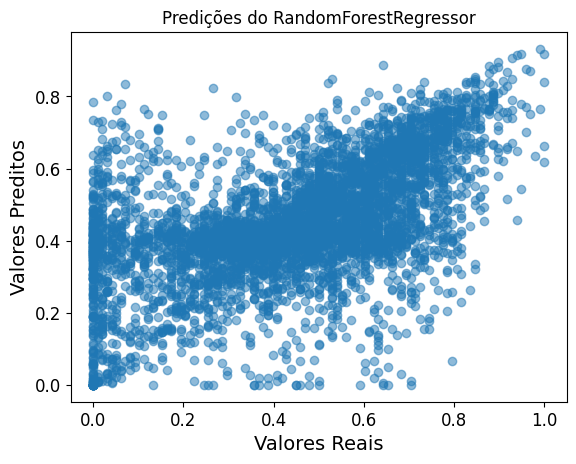

In [73]:
plot_predictions(val_set, model)

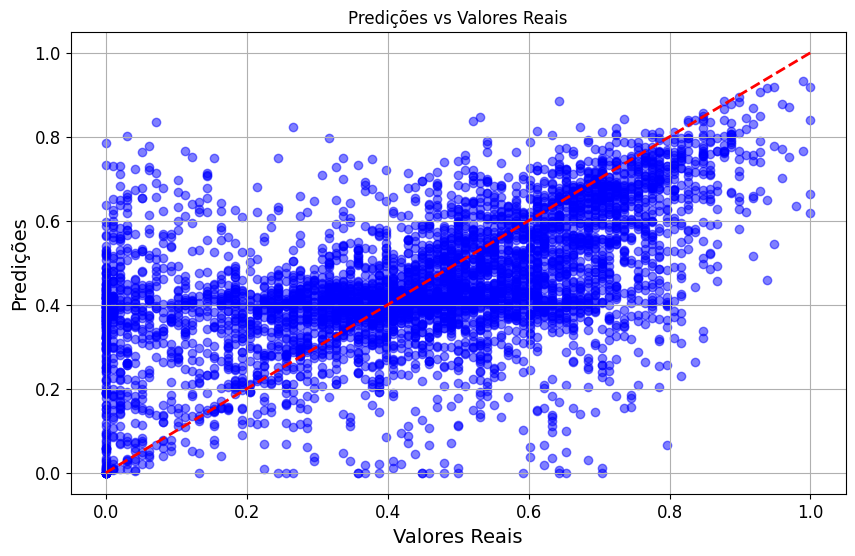

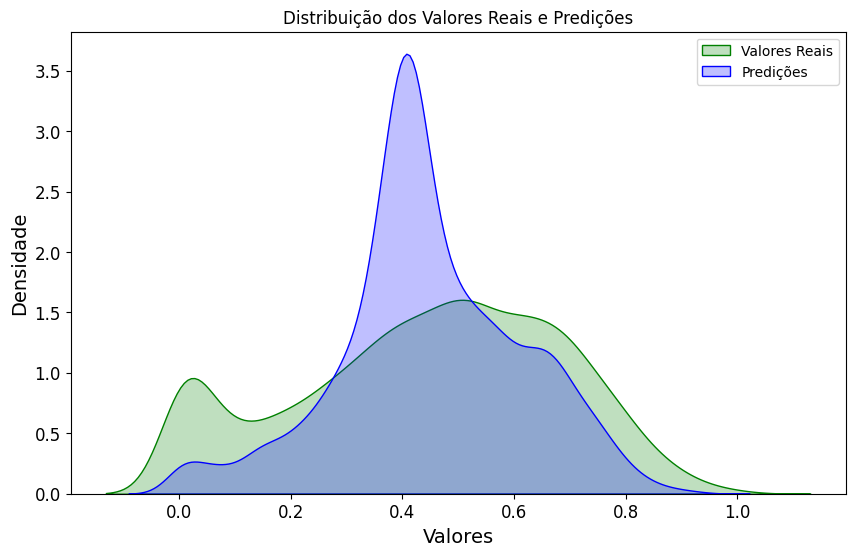

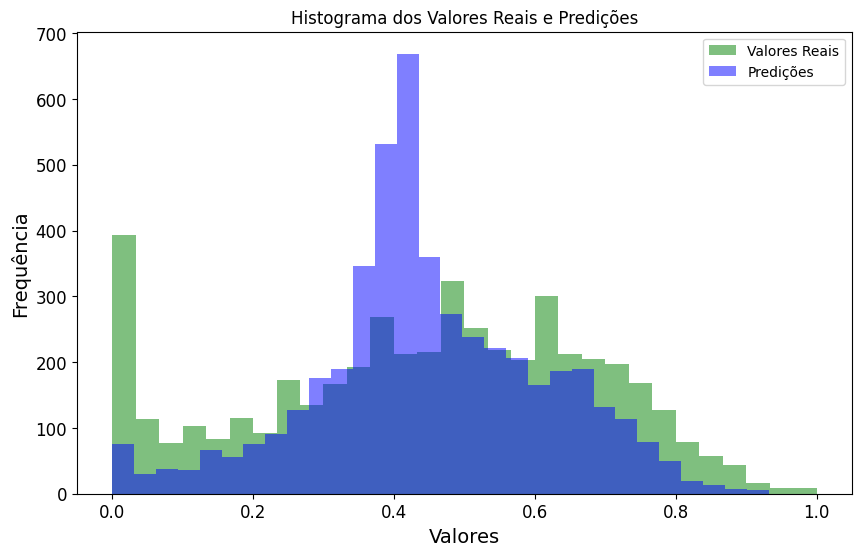

RMSE: 0.2009296993462981
Mean Cross-Validation MAE: 0.14455862731949815

Top 30 Features mais Importantes:
1. artist_popularity: 0.651949
2. tempo: 0.041131
3. liveness: 0.040519
4. valence: 0.038839
5. danceability: 0.038228
6. energy: 0.038045
7. track_year: 0.034912
8. track_duration_classification_4: 0.004112
9. key_1: 0.003754
10. playlist_subgenre_post-teen pop: 0.003621
11. track_duration_classification_3: 0.003551
12. playlist_genre_edm: 0.003310
13. playlist_subgenre_electropop: 0.003267
14. key_5: 0.003244
15. key_8: 0.003186
16. playlist_subgenre_latin hip hop: 0.003173
17. key_0: 0.003056
18. key_2: 0.003002
19. key_7: 0.002950
20. key_6: 0.002900
21. track_duration_classification_5: 0.002850
22. playlist_subgenre_trap: 0.002787
23. key_9: 0.002764
24. key_11: 0.002758
25. playlist_genre_pop: 0.002724
26. playlist_subgenre_pop edm: 0.002458
27. key_4: 0.002359
28. playlist_subgenre_hip hop: 0.002349
29. playlist_subgenre_dance pop: 0.002348
30. playlist_subgenre_urban conte

In [74]:
plotpredictions(model, y_pred, val_set[target_column], train_set, rmse, mean_cv_score)

In [208]:
# 25
# Mean Cross-Validation RMSE: 0.220644202278087
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.22248652335554006
# R2 no conjunto de teste: 0.1689513254431091
# 35
# Mean Cross-Validation RMSE: 0.21631554266509503
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.21836933383726725
# R2 no conjunto de teste: 0.1994244169294631
# 45
# Mean Cross-Validation RMSE: 0.21573114770325255
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.2181291273304192
# R2 no conjunto de teste: 0.20118471627084922

In [209]:
# plot_predictions(val_set, model)

In [210]:

# plotpredictions(model, y_pred, val_set[target_column], train_set, rmse, mean_cv_score)


##LinearRegressor

In [75]:
from sklearn.linear_model import LinearRegression

# Instanciando o modelo de Regressão Linear
lr_model = LinearRegression()

# Treinando e avaliando o modelo com o pipeline
lr_model, y_pred, rmse, mean_cv_score,r2 = pipeline(lr_model, train_set, val_set, target_column)


Mean Cross-Validation RMSE: 0.1423146897582569
Root Mean Squared Error (RMSE) no conjunto de teste: 0.20698448087746352
R2 no conjunto de teste: 0.24325947896976263


In [375]:
# 60
# Mean Cross-Validation RMSE: 0.22221658280071366
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.23076435101494652
# R2 no conjunto de teste: 0.10596096800159527

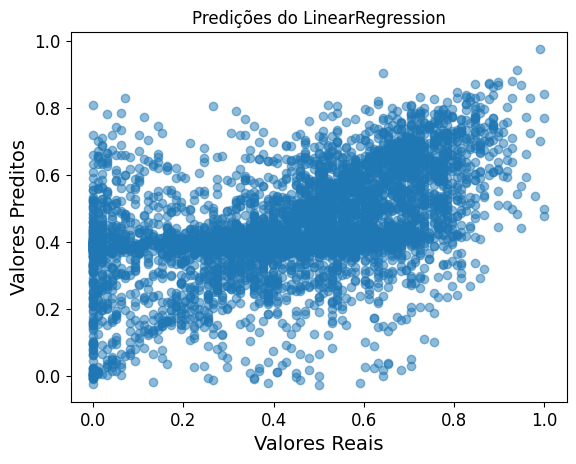

In [76]:
 plot_predictions(val_set, lr_model)

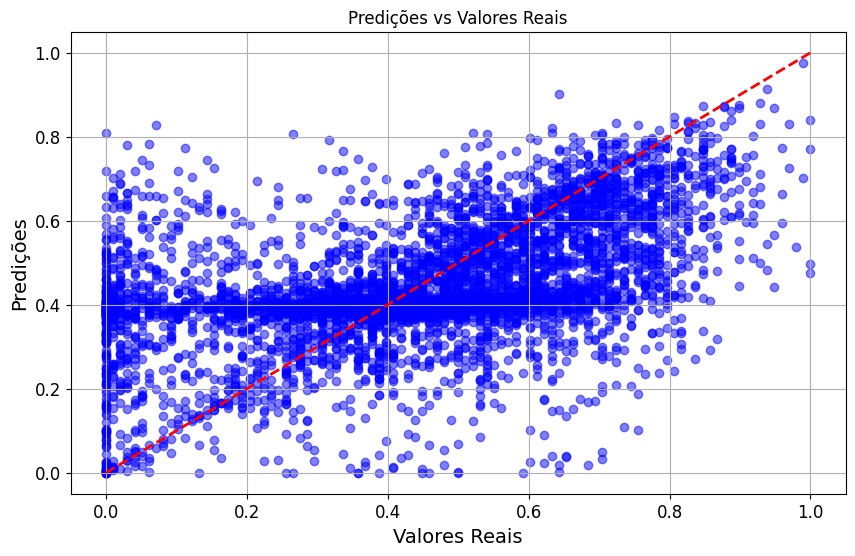

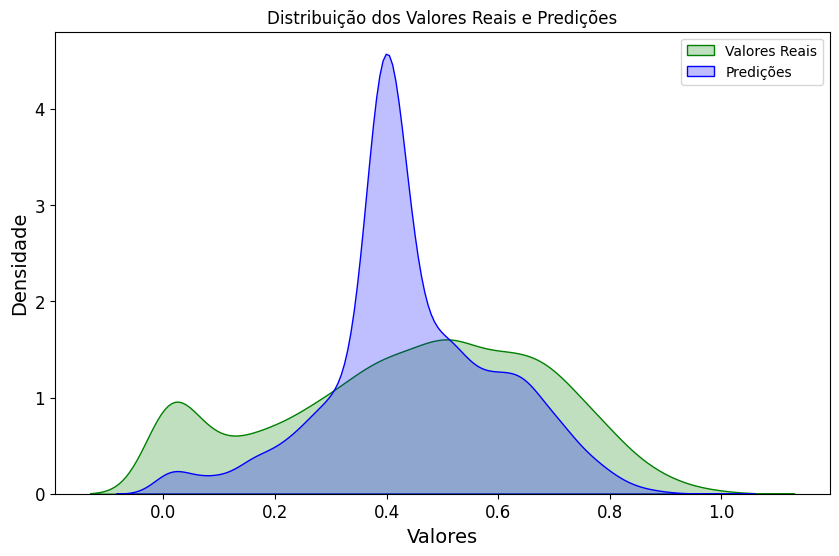

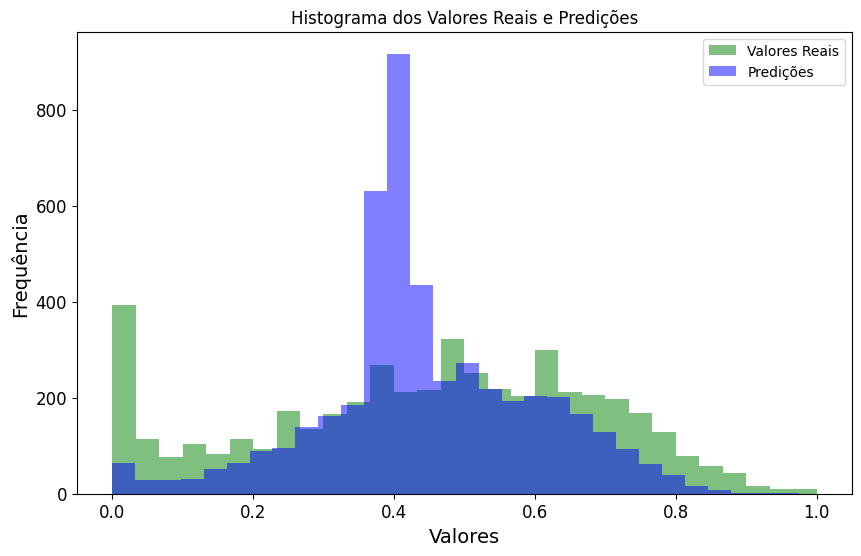

RMSE: 0.20698448087746352
Mean Cross-Validation MAE: 0.1423146897582569
O modelo não possui a propriedade 'feature_importances_' para calcular as importâncias das features.


In [77]:
 plotpredictions(lr_model, y_pred, val_set[target_column], train_set, rmse, mean_cv_score)

##ExtraTreeRegressor

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Instanciando o modelo ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=42)

# Criando pesos para as amostras (dá mais peso para as predições baixas)
# Atribuindo um peso maior para os valores baixos da popularidade (track_popularity)
sample_weights = np.where(
        ((train_set['track_popularity'] < 0.55)),
        100000,  # Peso maior para valores fora do intervalo [10, 70]
        1     # Peso normal para valores dentro do intervalo
    )

# Chamar o pipeline passando o modelo ExtraTreesRegressor com pesos
et_model, y_pred, rmse, mean_cv_score,r2 = pipeline(et_model, train_set, val_set, target_column,weights=sample_weights)


Mean Cross-Validation RMSE: 0.14873419148600162
Root Mean Squared Error (RMSE) no conjunto de teste: 0.20728222098650176
R2 no conjunto de teste: 0.24108082232745864


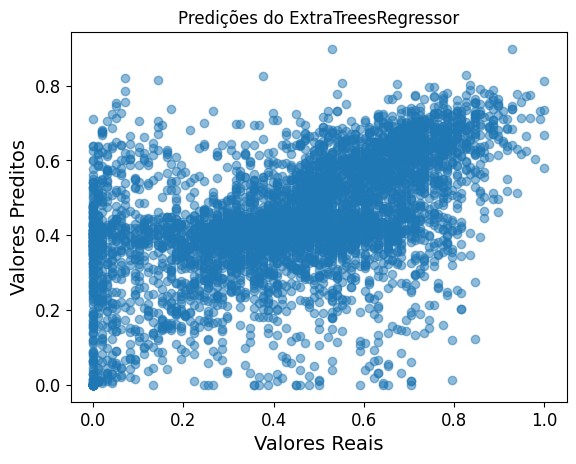

In [79]:
plot_predictions(val_set, et_model)


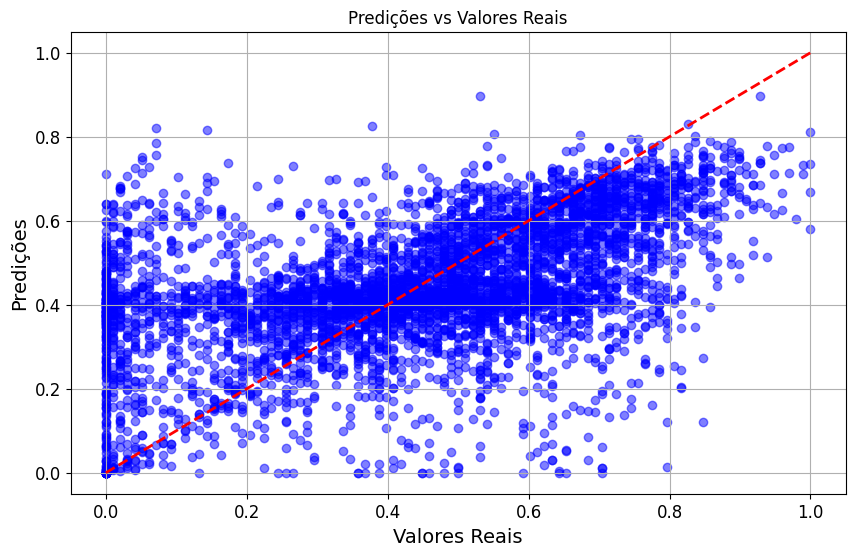

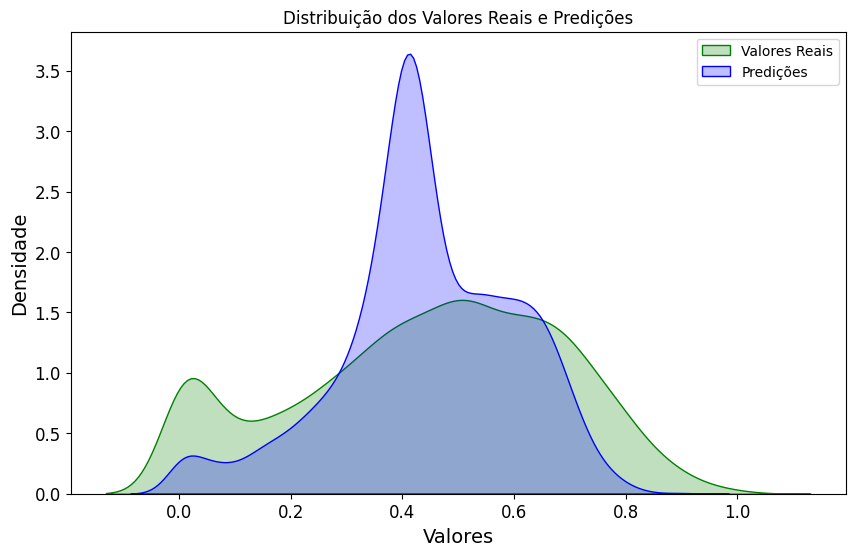

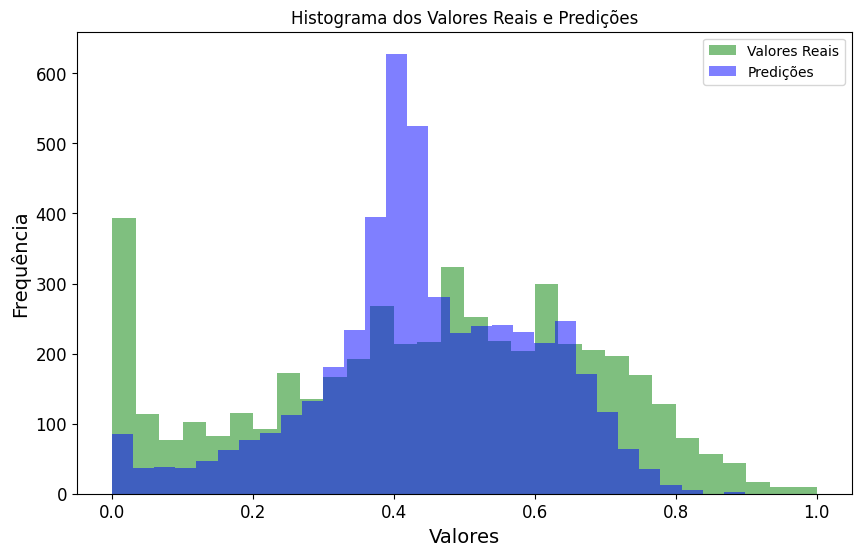

RMSE: 0.20728222098650176
Mean Cross-Validation MAE: 0.14873419148600162

Top 30 Features mais Importantes:
1. artist_popularity: 0.512960
2. track_year: 0.053746
3. valence: 0.031111
4. liveness: 0.030070
5. danceability: 0.029305
6. energy: 0.028879
7. tempo: 0.027057
8. key_1: 0.012792
9. track_duration_classification_4: 0.010410
10. key_7: 0.010137
11. key_8: 0.010078
12. track_duration_classification_3: 0.010076
13. key_0: 0.009659
14. key_9: 0.009593
15. key_5: 0.009428
16. key_2: 0.009268
17. key_11: 0.008977
18. key_6: 0.008601
19. track_duration_classification_5: 0.008535
20. key_10: 0.008099
21. key_4: 0.007144
22. playlist_subgenre_hip hop: 0.006582
23. playlist_subgenre_gangster rap: 0.005447
24. playlist_genre_edm: 0.005374
25. key_3: 0.005352
26. playlist_subgenre_progressive electro house: 0.005321
27. playlist_subgenre_hard rock: 0.005178
28. track_duration_classification_2: 0.005048
29. playlist_subgenre_latin hip hop: 0.004778
30. playlist_subgenre_trap: 0.004588


In [80]:
plotpredictions(et_model, y_pred, val_set[target_column], train_set, rmse, mean_cv_score)

In [199]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definição do modelo
et_model = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# Definição do espaço de busca dos hiperparâmetros
param_dist = {
    'n_estimators': [100, 200, 300, 500],  # Número de árvores
    'max_depth': [None, 10, 20, 30, 50],   # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],       # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],         # Mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2', None], # Número máximo de features consideradas em cada divisão
    'bootstrap': [True, False]             # Uso de bootstrap
}

# Configuração do RandomizedSearchCV
random_search = RandomizedSearchCV(
    et_model, param_distributions=param_dist,
    n_iter=20,  # Número de combinações testadas
    cv=5,  # Validação cruzada com 5 folds
    scoring='neg_root_mean_squared_error',  # Métrica de avaliação
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Executando o RandomizedSearchCV
random_search.fit(train_set.drop(columns=['track_popularity']), train_set['track_popularity'])

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)

# Treinando o modelo com os melhores hiperparâmetros
best_et_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores hiperparâmetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 30, 'bootstrap': True}


In [127]:
# Treinando o modelo com os melhores hiperparâmetros
best_et_model = ExtraTreesRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features=None,
    max_depth=30,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Treinando e avaliando o modelo com a pipeline
best_et_model, y_pred, rmse, mean_cv_score, r2 = pipeline(best_et_model, train_set, val_set, 'track_popularity')


Mean Cross-Validation RMSE: 0.14359518509296837
Root Mean Squared Error (RMSE) no conjunto de teste: 0.18002546566925845
R2 no conjunto de teste: 0.4278449329308681


In [ ]:
# 60
# Mean Cross-Validation RMSE: 0.21852421028430985
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.22361413079490156
# R2 no conjunto de teste: 0.16050612747773252

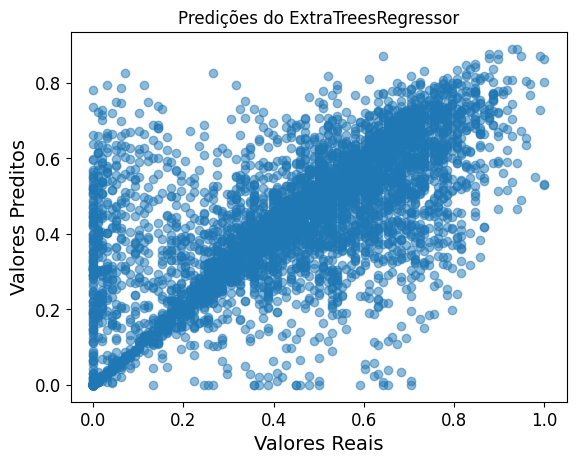

In [128]:
plot_predictions(val_set, best_et_model)

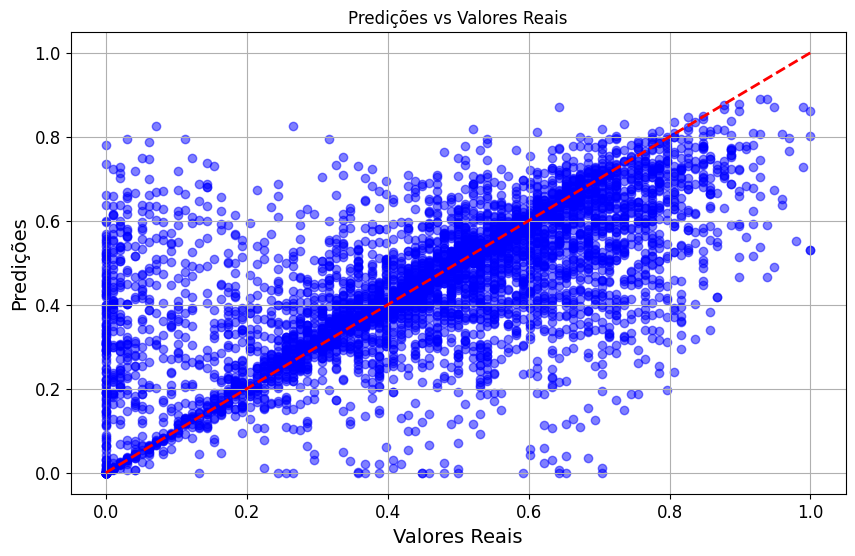

<ipython-input-55-4e22da34b317>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_true, color='green', shade=True, label='Valores Reais')
<ipython-input-55-4e22da34b317>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, color='blue', shade=True, label='Predições')


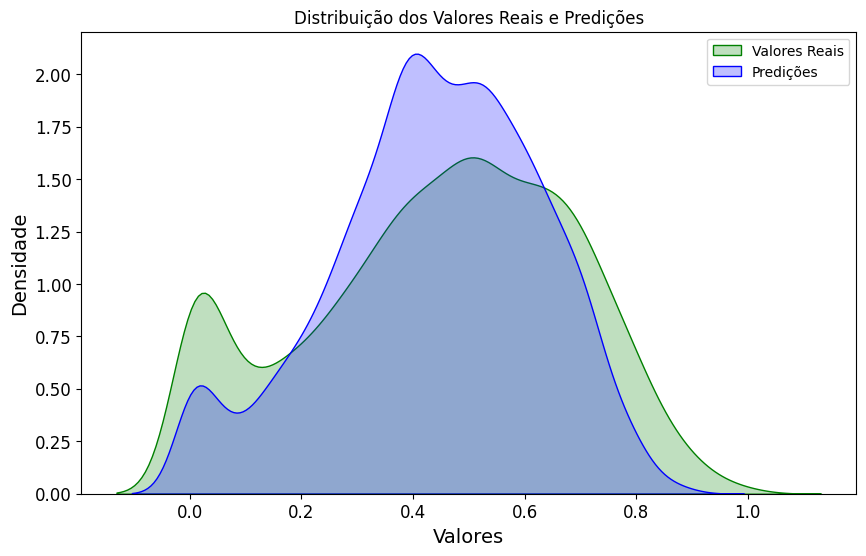

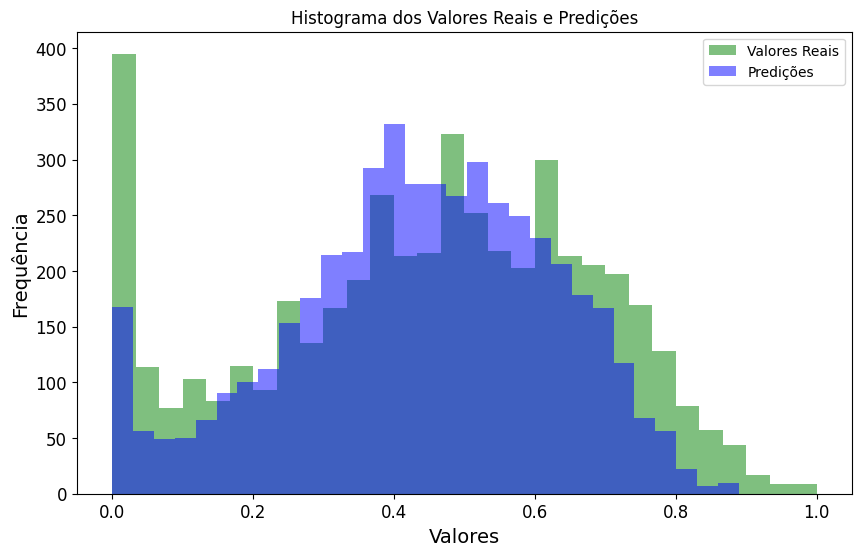

RMSE: 0.18002546566925845
Mean Cross-Validation MAE: 0.14359518509296837

Top 30 Features mais Importantes:
1. artist_popularity: 0.786964
2. track_year: 0.025674
3. valence: 0.016114
4. energy: 0.014691
5. playlist_genre_edm: 0.014500
6. danceability: 0.014280
7. tempo: 0.013932
8. liveness: 0.013556
9. track_duration_classification_4: 0.008956
10. track_duration_classification_3: 0.008716
11. playlist_genre_rap: 0.006013
12. playlist_genre_pop: 0.005845
13. key_1: 0.005525
14. playlist_genre_r&b: 0.004822
15. playlist_genre_latin: 0.004745
16. track_duration_classification_5: 0.004670
17. key_0: 0.004364
18. playlist_genre_rock: 0.004343
19. key_5: 0.004040
20. key_7: 0.004031
21. key_11: 0.003920
22. key_8: 0.003811
23. key_2: 0.003798
24. key_9: 0.003535
25. key_6: 0.003196
26. key_4: 0.002735
27. key_10: 0.002709
28. track_duration_classification_6: 0.002144
29. track_duration_classification_2: 0.001693
30. key_3: 0.001509


In [129]:
plotpredictions(best_et_model, y_pred, val_set[target_column], train_set, rmse, mean_cv_score)

##CatBoost

In [81]:
!pip install catboost
from catboost import CatBoostRegressor

# Instanciando o modelo CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=10, verbose=500)

# Treinando com ou sem pesos
model, y_pred, rmse, mean_cv_rmse, r2 = pipeline(catboost_model, train_set, val_set, target_column)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00
0:	learn: 0.2238986	total: 80.8ms	remaining: 2m 41s
500:	learn: 0.1010677	total: 15.3s	remaining: 45.7s
1000:	learn: 0.0751389	total: 30.1s	remaining: 30s
1500:	learn: 0.0574357	total: 45.1s	remaining: 15s
1999:	learn: 0.0447791	total: 1m	remaining: 0us
0:	learn: 0.2242691	total: 47.1ms	remaining: 1m 34s
500:	learn: 0.1019358	total: 15.8s	remaining: 47.2s
1000:	learn: 0.0755111	total: 31s	remaining: 31s
1500:	learn: 0.0577794	total: 45.7s	remaining: 15.2s
1999:	learn: 0.0449245	total: 1m	remaining: 0us
0:	learn: 0.2233438	total: 25.1ms	remaining: 50.1s
500:	learn: 0.1020227	total: 15s	remaining: 44.9s
1000:	learn: 0.0762244	total: 29.9s	remaining: 29.9s
1500:	learn: 0.0579743	total: 44.9s	remaining: 14.9s
1999:	learn: 0.0457986	total: 59.6s	remaining: 0us
0:	learn: 0.2237187	total: 26ms	remaining: 52s
500:	learn: 0.1005957	total: 15.1s	remaining: 45s
1000:	learn: 0.0753259	total: 29.9s	remaining: 29.9s
1500:	

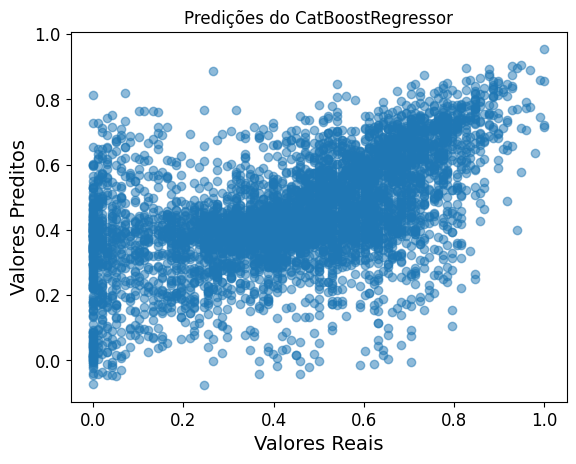

In [82]:
plot_predictions(val_set, catboost_model)

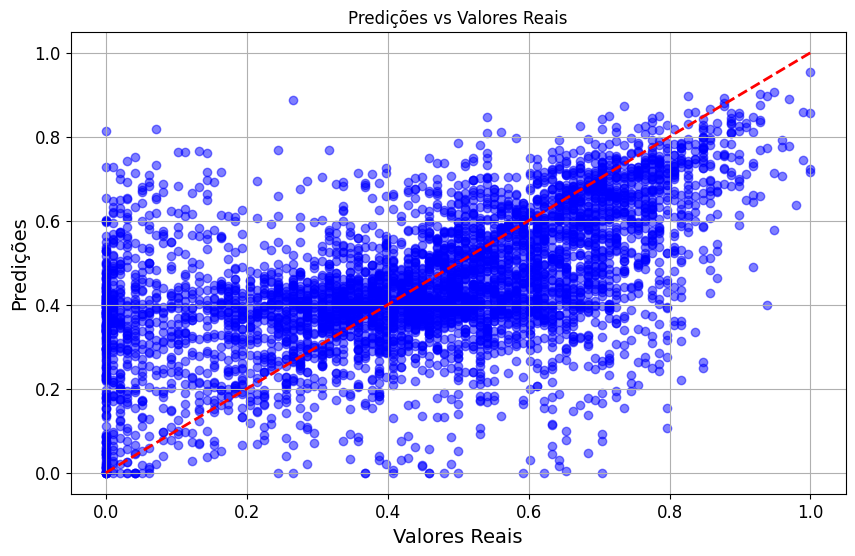

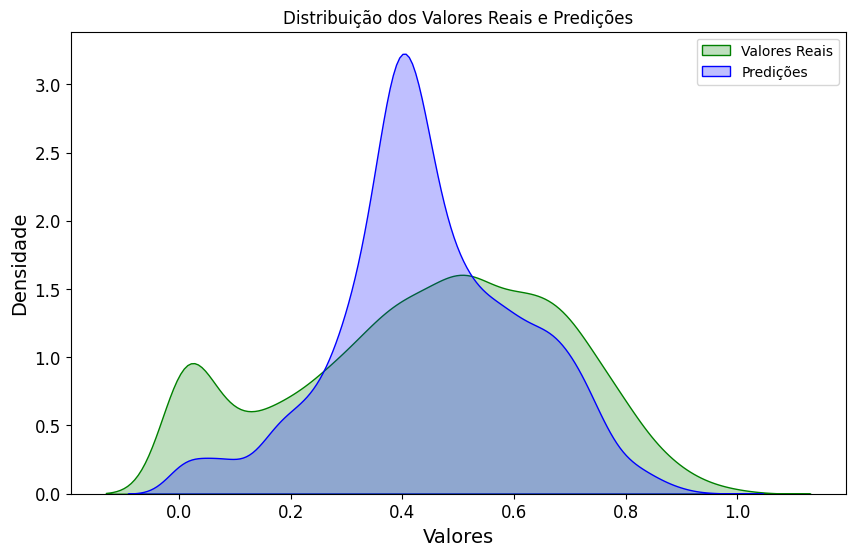

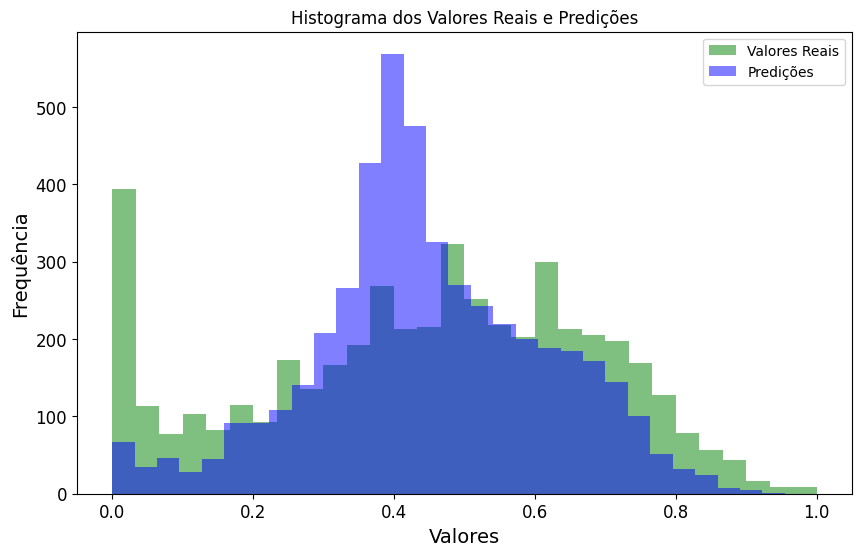

RMSE: 0.20197397396641187
Mean Cross-Validation MAE: 0.1466528365920418

Top 30 Features mais Importantes:
1. artist_popularity: 26.725580
2. track_year: 9.895914
3. liveness: 8.669977
4. energy: 8.480464
5. valence: 8.356610
6. danceability: 8.226132
7. tempo: 8.019824
8. track_duration_classification_4: 2.239579
9. track_duration_classification_3: 1.869567
10. key_1: 1.012263
11. track_duration_classification_5: 0.702335
12. playlist_genre_edm: 0.681591
13. key_0: 0.658097
14. playlist_genre_pop: 0.648729
15. key_8: 0.638121
16. key_2: 0.595111
17. key_6: 0.588970
18. key_5: 0.567961
19. key_7: 0.544225
20. playlist_subgenre_electropop: 0.510800
21. playlist_subgenre_post-teen pop: 0.457979
22. playlist_subgenre_latin hip hop: 0.450918
23. playlist_subgenre_new jack swing: 0.450302
24. playlist_subgenre_trap: 0.446742
25. key_11: 0.429813
26. playlist_subgenre_hip hop: 0.420972
27. playlist_subgenre_pop edm: 0.409110
28. key_9: 0.371822
29. playlist_subgenre_hard rock: 0.350860
30. p

In [83]:
plotpredictions(catboost_model, y_pred, val_set[target_column], train_set, rmse, mean_cv_rmse)


##SVR

In [84]:
from sklearn.svm import SVR

# Instancia o modelo SVR
svr_model = SVR()

# Chama a pipeline
svr_model, y_pred, rmse, mean_cv_rmse, r2 = pipeline(svr_model, train_set, val_set, 'track_popularity')


Mean Cross-Validation RMSE: 0.14773039668409288
Root Mean Squared Error (RMSE) no conjunto de teste: 0.2072848727293482
R2 no conjunto de teste: 0.2410614046334234


In [ ]:
# 65
# Mean Cross-Validation RMSE: 0.21448933688221428
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.2211866539305628
# R2 no conjunto de teste: 0.17863370145302115
# 70
# Mean Cross-Validation RMSE: 0.21447509830657197
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.22113709955057415
# R2 no conjunto de teste: 0.17900169597257332
# 80
# Mean Cross-Validation RMSE: 0.21444812093956717
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.2211060219901786
# R2 no conjunto de teste: 0.17923243818252088

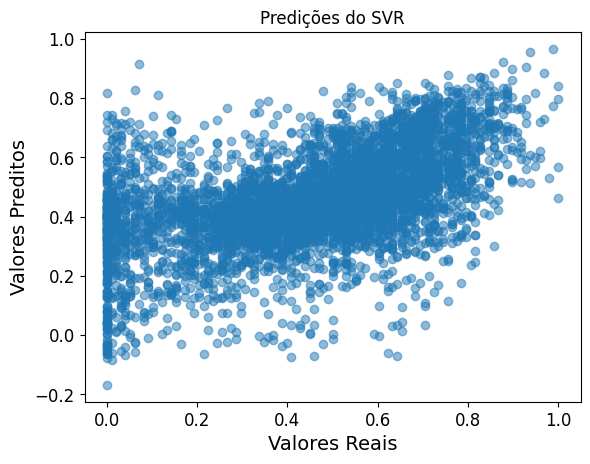

In [85]:
plot_predictions(val_set, svr_model)

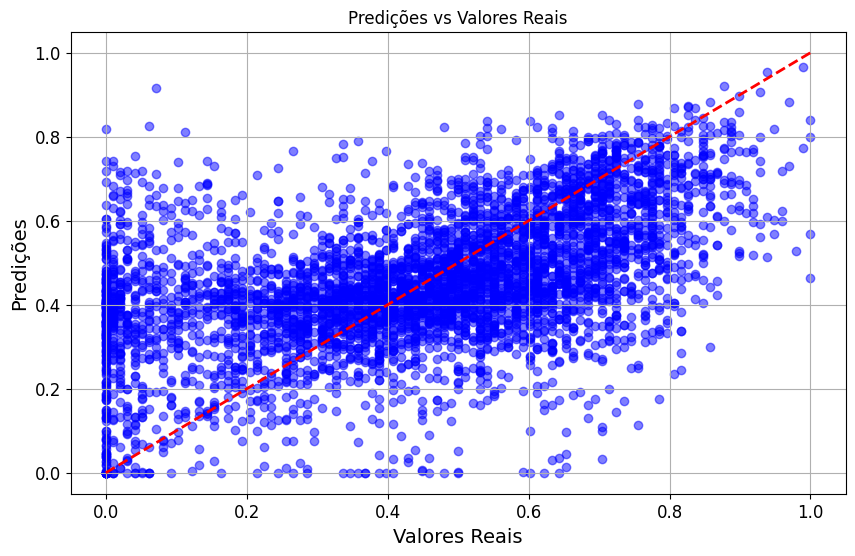

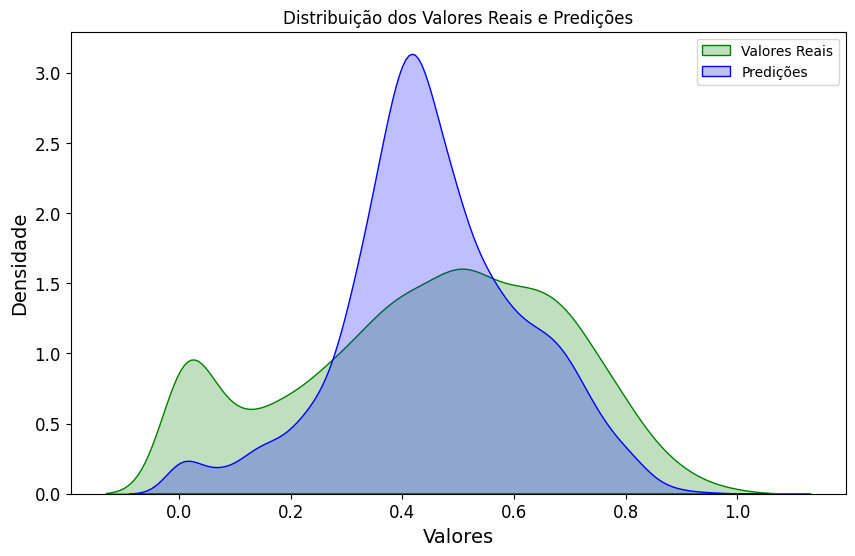

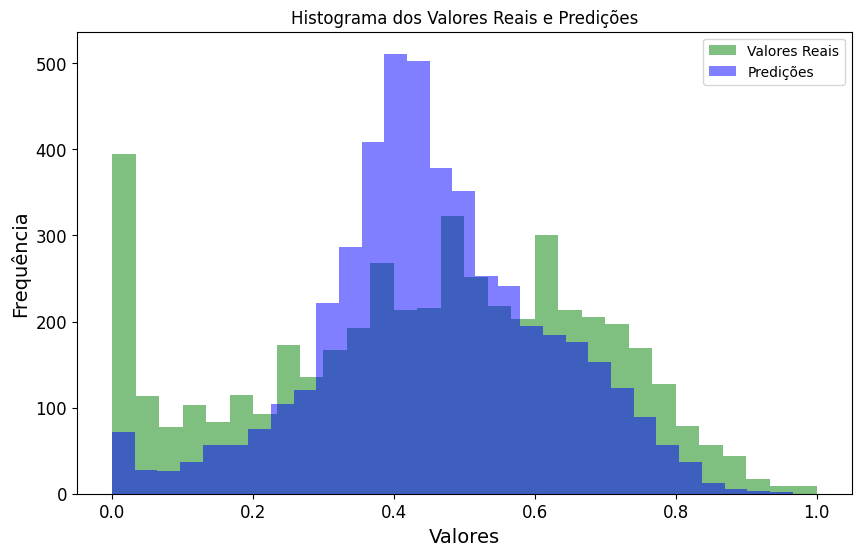

RMSE: 0.2072848727293482
Mean Cross-Validation MAE: 0.14773039668409288
O modelo não possui a propriedade 'feature_importances_' para calcular as importâncias das features.


In [86]:
plotpredictions(svr_model, y_pred, val_set['track_popularity'], train_set, rmse, mean_cv_rmse)


##Neural Network

In [122]:
from sklearn.neural_network import MLPRegressor
from tensorflow.keras import layers, models

# Instancia um modelo MLP (Multilayer Perceptron)
mlp_model = models.Sequential([
    layers.Input(shape=(train_set.drop(columns='track_popularity').shape[1],)),  # Define a forma de entrada
    layers.Dense(64, activation='relu'),  # Primeira camada densa com 64 neurônios e ReLU
    layers.Dense(1, activation='sigmoid')  # Camada de saída com ativação sigmoide
])
# Chama a pipeline
mlp_model, y_pred, rmse, mean_cv_rmse, r2 = pipeline(mlp_model, train_set, val_set, 'track_popularity')


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Cross-Validation RMSE: 0.21325929303259228
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Root Mean Squared Error (RMSE) no conjunto de teste: 0.22331667948370837
R2 no conjunto de teste: 0.11912609624197079


In [384]:
# 40
# Mean Cross-Validation RMSE: 0.2183274123349951
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.22322766683159212
# R2 no conjunto de teste: 0.16340535190772076
# 50
# Mean Cross-Validation RMSE: 0.2179120792804501
# Root Mean Squared Error (RMSE) no conjunto de teste: 0.22091631520711066
# R2 no conjunto de teste: 0.18064025490001556

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


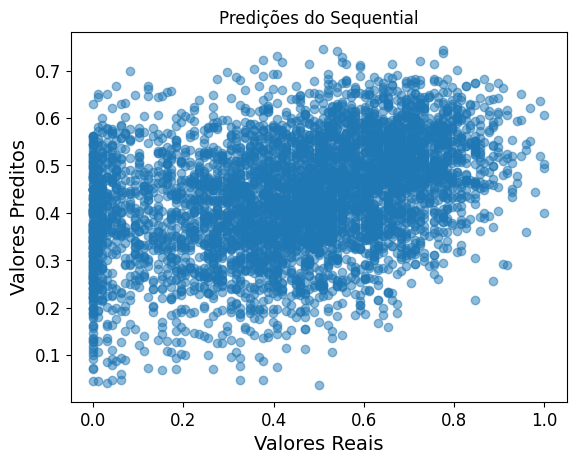

In [123]:
plot_predictions(val_set, mlp_model)

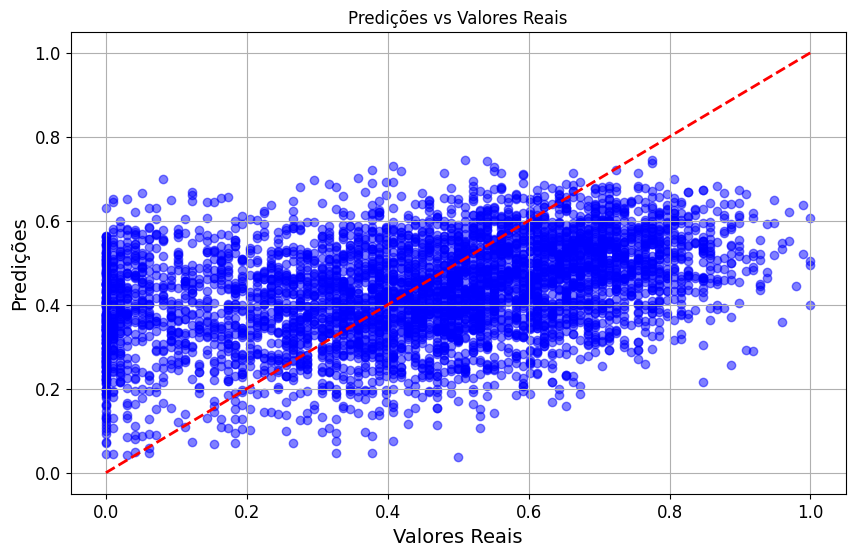

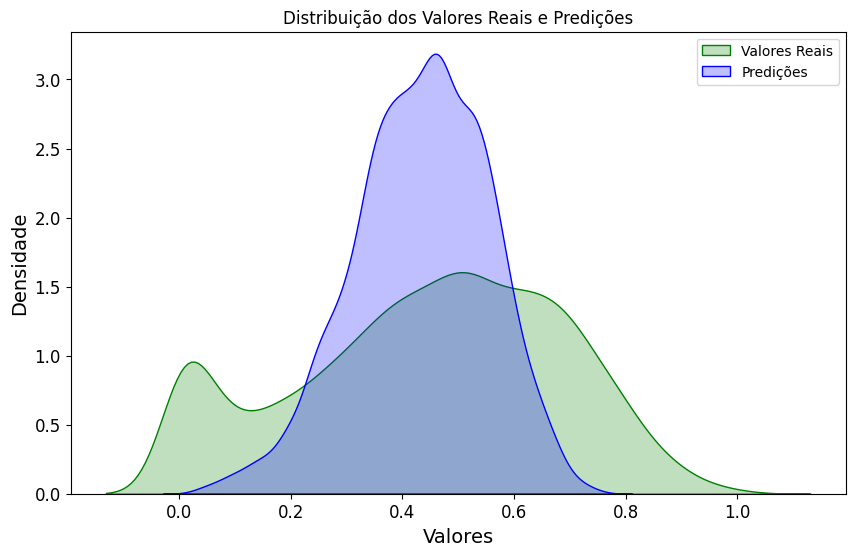

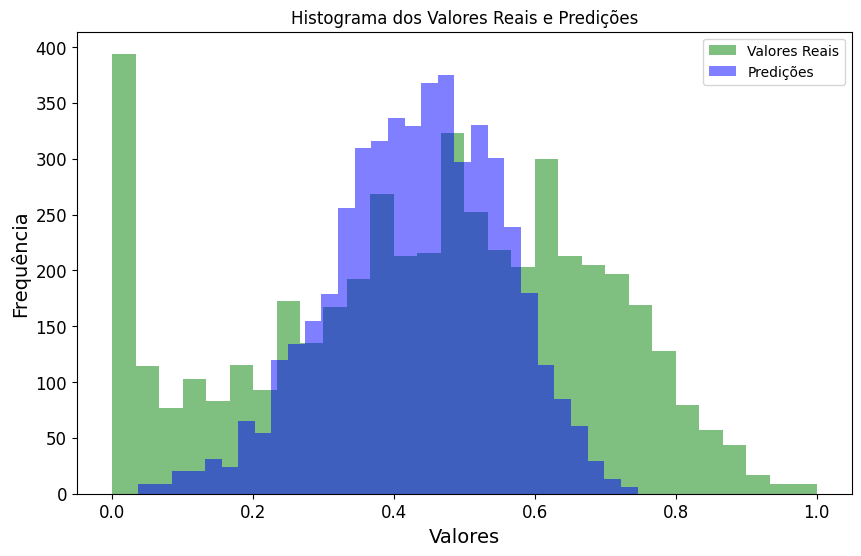

RMSE: 0.22331667948370837
Mean Cross-Validation MAE: 0.21325929303259228
O modelo não possui a propriedade 'feature_importances_' para calcular as importâncias das features.


In [124]:
plotpredictions(mlp_model, y_pred, val_set['track_popularity'], train_set, rmse, mean_cv_rmse)


In [125]:
results_df = pd.DataFrame({
    'Real': val_set['track_popularity'],
    'Predição': y_pred
})

# Exibe as primeiras 10 linhas da lista de predições vs valores reais
print(results_df.head(60))

        Real  Predição
0   0.622449  0.301393
1   0.775510  0.500014
2   0.867347  0.549157
3   0.561224  0.592302
4   0.591837  0.214478
5   0.714286  0.554945
6   0.255102  0.230847
7   0.714286  0.335878
8   0.244898  0.332332
9   0.469388  0.515563
10  0.173469  0.477817
11  0.000000  0.341801
12  0.397959  0.464805
13  0.387755  0.316177
14  0.561224  0.558603
15  0.785714  0.614488
16  0.255102  0.136752
17  0.663265  0.553818
18  0.704082  0.471765
19  0.438776  0.600651
20  0.000000  0.220076
21  0.734694  0.372607
22  0.020408  0.307998
23  0.969388  0.621260
24  0.479592  0.589587
25  0.173469  0.402751
26  0.673469  0.505859
27  0.755102  0.508421
28  0.602041  0.529062
29  0.612245  0.433702
30  0.000000  0.127064
31  0.795918  0.609339
32  0.540816  0.556017
33  0.010204  0.328475
34  0.316327  0.509996
35  0.061224  0.233115
36  0.459184  0.454897
37  0.285714  0.280636
38  0.469388  0.473362
39  0.724490  0.439067
40  0.418367  0.394652
41  0.255102  0.445434
42  0.32653

##Ridge

In [356]:
from sklearn.linear_model import Ridge

# Instancia o modelo Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)  # Pode ajustar alpha conforme necessário

# Chama a pipeline
ridge_model, y_pred, rmse, mean_cv_rmse, r2 = pipeline(ridge_model, train_set, val_set, 'track_popularity')


Mean Cross-Validation RMSE: 0.1423389664111044
Root Mean Squared Error (RMSE) no conjunto de teste: 0.18187092113308115
R2 no conjunto de teste: 0.4157510325771445


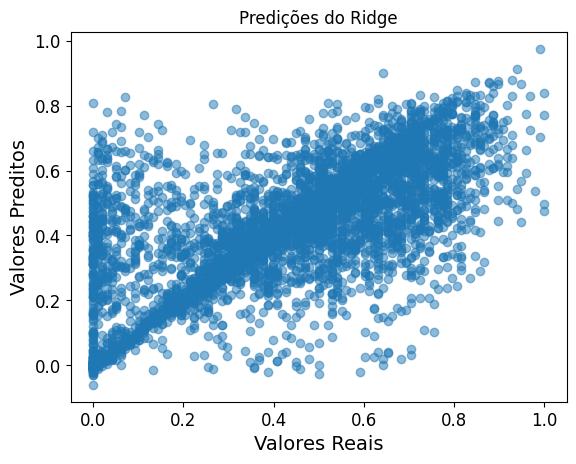

In [357]:
plot_predictions(val_set, ridge_model)

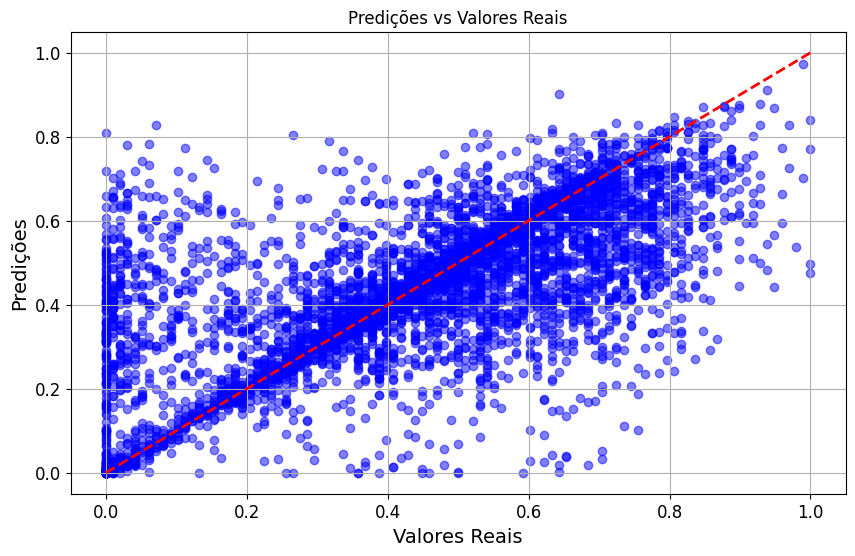

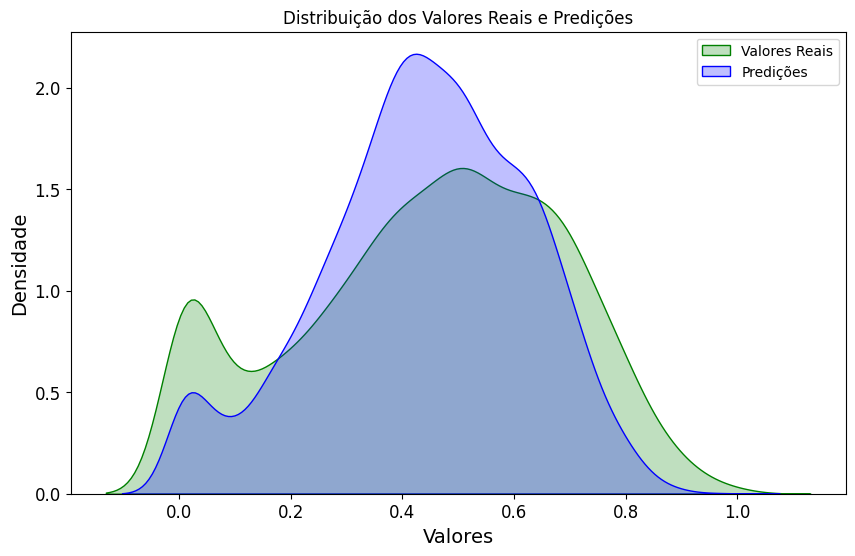

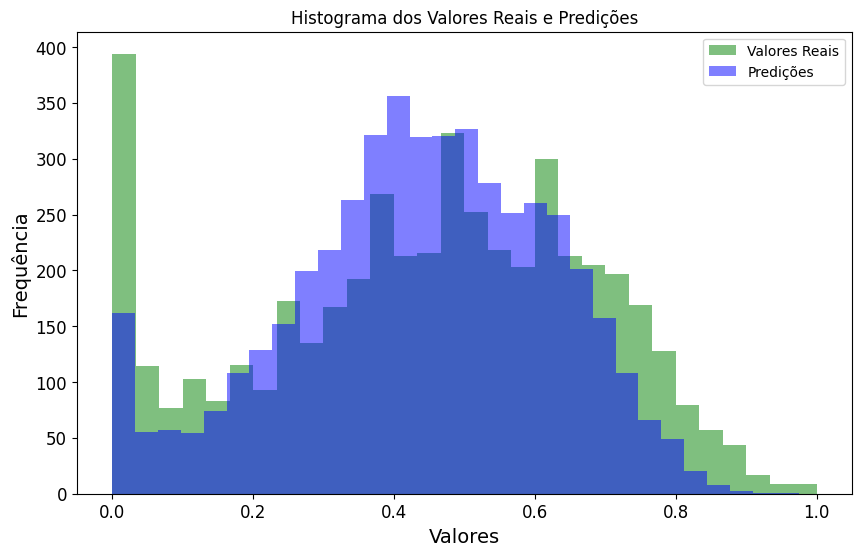

RMSE: 0.18187092113308115
Mean Cross-Validation MAE: 0.1423389664111044
O modelo não possui a propriedade 'feature_importances_' para calcular as importâncias das features.


In [358]:
plotpredictions(ridge_model, y_pred, val_set['track_popularity'], train_set, rmse, mean_cv_rmse)

##VoltingRegressor

In [365]:
from sklearn.ensemble import VotingRegressor

# Listando os modelos já treinados
voting_model = VotingRegressor(estimators=[
    ('rf', model),  # RandomForestRegressor treinado
    ('et', et_model),  # ExtraTreesRegressor treinado
    ('catboost', catboost_model),  # CatBoostRegressor treinado
    ('svr', svr_model),  # SVR treinado
    ('redge',ridge_model)
])

# Chama a pipeline para o VotingRegressor com os modelos treinados
voting_model, y_pred, rmse, mean_cv_rmse, r2 = pipeline(voting_model, train_set, val_set, 'track_popularity')


ValueError: The estimator Sequential should be a regressor.

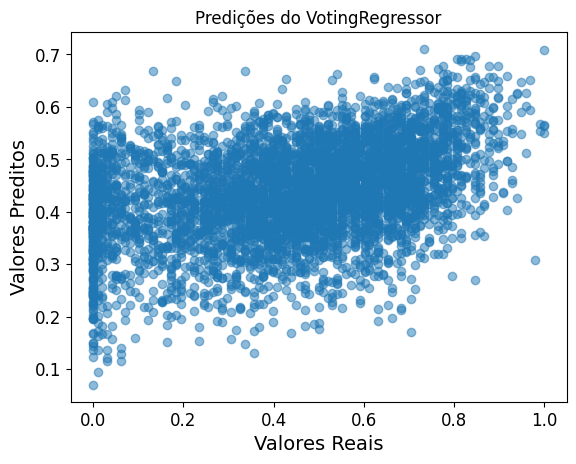

In [102]:
plot_predictions(val_set, voting_model)

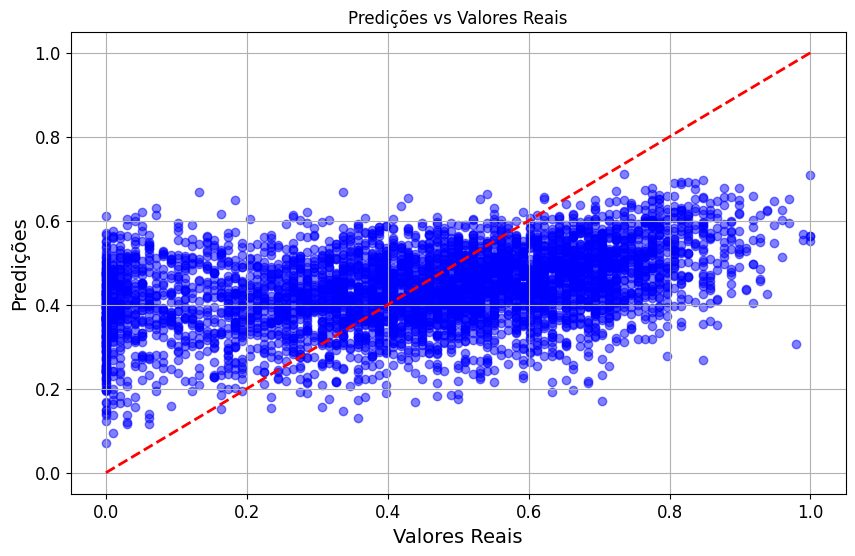

<ipython-input-75-4e22da34b317>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_true, color='green', shade=True, label='Valores Reais')
<ipython-input-75-4e22da34b317>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, color='blue', shade=True, label='Predições')


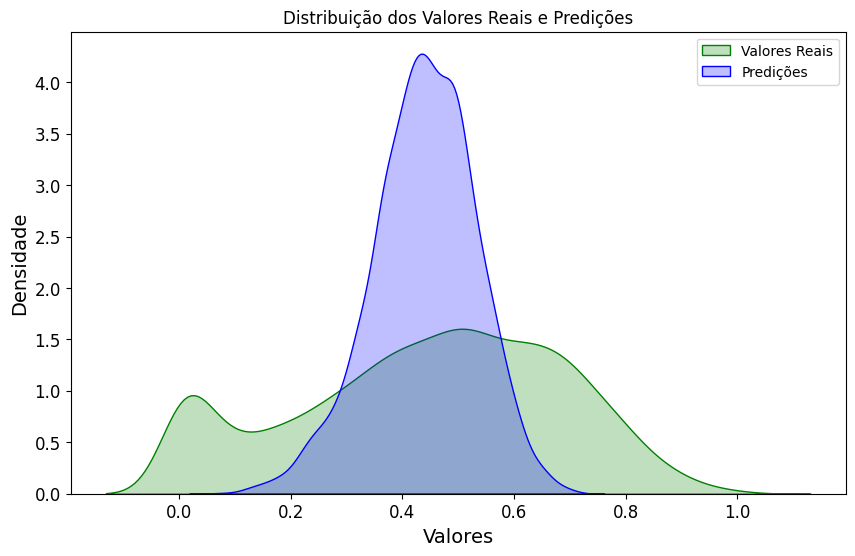

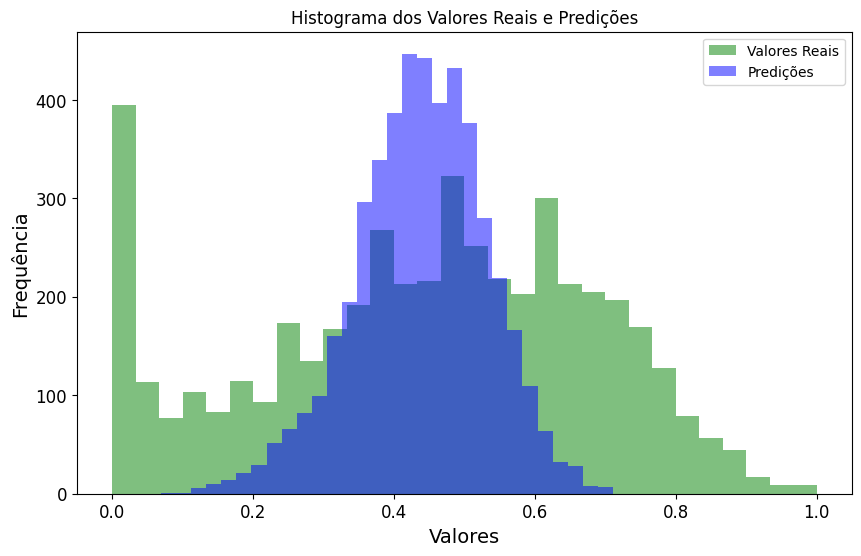

RMSE: 0.2180568437290285
Mean Cross-Validation MAE: 0.21823960406342846
O modelo não possui a propriedade 'feature_importances_' para calcular as importâncias das features.


In [103]:
plotpredictions(voting_model, y_pred, val_set['track_popularity'], train_set, rmse, mean_cv_rmse)

##StackingRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking_model = StackingRegressor(estimators=[
    ('rf', model),
    ('et', et_model),
    ('catboost', catboost_model),
    ('svr', svr_model),
    ('ridge', ridge_model),
], final_estimator=LinearRegression())
stacking_model, y_pred, rmse, mean_cv_rmse, r2 = pipeline(stacking_model, train_set, val_set, 'track_popularity')

0:	learn: 0.2238986	total: 26.9ms	remaining: 53.9s
500:	learn: 0.1010677	total: 14.7s	remaining: 44.1s
1000:	learn: 0.0751389	total: 29.5s	remaining: 29.4s
1500:	learn: 0.0574357	total: 44.3s	remaining: 14.7s
1999:	learn: 0.0447791	total: 59s	remaining: 0us
0:	learn: 0.2238986	total: 25.1ms	remaining: 50.2s
500:	learn: 0.1010677	total: 14.9s	remaining: 44.5s
1000:	learn: 0.0751389	total: 33.1s	remaining: 33s
1500:	learn: 0.0574357	total: 50.8s	remaining: 16.9s
1999:	learn: 0.0447791	total: 1m 5s	remaining: 0us
0:	learn: 0.2218033	total: 33.9ms	remaining: 1m 7s
500:	learn: 0.0960369	total: 14.6s	remaining: 43.6s
1000:	learn: 0.0673367	total: 31.2s	remaining: 31.1s
1500:	learn: 0.0495237	total: 45.9s	remaining: 15.3s
1999:	learn: 0.0374584	total: 1m	remaining: 0us
0:	learn: 0.2217412	total: 25.9ms	remaining: 51.9s
500:	learn: 0.0963173	total: 14.7s	remaining: 43.9s
1000:	learn: 0.0688737	total: 29.1s	remaining: 29.1s
1500:	learn: 0.0502212	total: 43.6s	remaining: 14.5s
1999:	learn: 0.037